# Station Analyze Dataset

In [1]:
from obspy import * 
from pandas import *
from os import listdir,uname

import netCDF4 as nc
import numpy as np

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
def __conversion(data, informat=None, outformat=None):
    '''
    data:                  array 
    informat/outformat:    ASD, PSD, DB
    '''
    from numpy import log10, sqrt
    
    
    if informat == 'ASD' and outformat == 'PSD':
        return data**2
    
    elif informat == 'PSD' and outformat == 'ASD':
        return sqrt(data)

    elif informat == 'ASD' and outformat == 'DB':
        return 10*log10(data)
    
    elif informat == 'PSD' and outformat == 'DB':
        return 10*log10(data)
    
    elif informat == 'DB' and outformat == 'PSD':
        return 10**(data/10)
    
    elif informat == 'DB' and outformat == 'ASD':
        return sqrt(10**(data/10))
    
    else:
        print(" -> specified case not defined!")

In [3]:
def __get_array_from_dataframe(df):
    
    from pandas import to_numeric
    from numpy import array
    
    ## convert to list
    psds = []
    for col in array(df.columns):
        
        ## turn non-float series to float objects
        df[col] = to_numeric(df[col], errors = 'coerce')

        ## add to psds list
        psds.append(array(df[col]))

    return array(psds)

## Configurations

In [4]:
config = {}

config['hostname'] = uname()[1]

if config['hostname'] == 'kilauea':
    config['workdir'] = "/export/data/LNM/data/"
    config['outdir_figures'] = "/home/brotzer/Documents/ROMY/LowNoiseModel/figures/"    
elif config['hostname'] == 'lighthouse':
    config['workdir'] = "/home/andbro/kilauea-data/LNM/data/"
    config['outdir_figures'] = "/home/andbro/Documents/ROMY/LowNoiseModel/figures/"
else: 
    print(f"Hostname: {config['hostname']} not known!")


config['year'] = "2019"

    
config['love_phase_nc'] = "PHASE_VELOCITY_MODEL/LovePhaseVelocity.nc"
config['rayleigh_phase_nc'] = "PHASE_VELOCITY_MODEL/RayleighPhaseVelocity.nc"

config['datadir_spectra'] = config['workdir']+config['year']+"/"

config['datadir_stats'] = config['workdir']+"STATS/"

config['spectra_files'] = listdir(config['datadir_spectra'])

config['noise_models'] =  config['workdir']+"MODELS/""noise_models.npz"


if config['year'] == "2018":
    config['excluded_stations'] = ['KAPI', 'TRQA', 'QSPA', 'FUNA', 'SAML']
elif config['year'] == "2019":
    config['excluded_stations'] = ['KAPI', 'TRQA', 'QSPA', 'FUNA', 'SAML', 'PAYG', 'SDV', 'TSUM']

## Analyse Dataset 

In [5]:
stations = DataFrame()

stations['sta'] = config['spectra_files']

stations['names'] = [s.split("_")[1] for s in stations['sta']]

print(f"total stations:  {stations.names.size}")
print(f"unique stations: {stations.names.unique().size}")
select = [sta for sta in stations.names.unique() if sta not in config['excluded_stations']]
print(f"unique stations (excluded): {len(select)}")

stations['count'] = np.ones(stations.names.size)


new = stations.groupby(by='names')['count'].sum()

total stations:  240
unique stations: 127
unique stations (excluded): 119


<Figure size 1080x360 with 0 Axes>

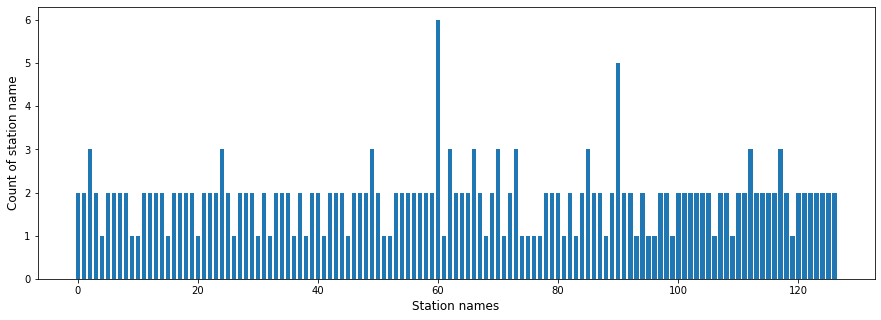

In [6]:
plt.figure(figsize=(15,5))

plt.figure(figsize=(15,5))
plt.bar(range(new.index.size), height=new)

plt.ylabel("Count of station name", fontsize=12)
plt.xlabel("Station names", fontsize=12)

plt.show();

## Show multiple Channel Stations

In [7]:
stations['count'] = np.ones(stations.names.size)

test = stations[stations.names.duplicated()]
names = test.names.unique()

counts = test.groupby(by=["names"])['count'].sum()

df = DataFrame()
df['counts'] = counts+1
df['names'] = names

df = df[df.counts > 2]

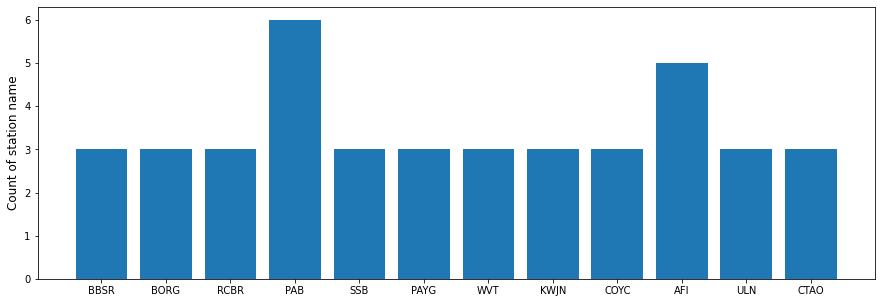

In [8]:
plt.figure(figsize=(15,5))

plt.bar(df['names'], df['counts'])

plt.ylabel("Count of station name", fontsize=12)

plt.show();

## Check Spectra of Stations

In [9]:
medians_stations = read_pickle(config['datadir_stats']+f"{config['year']}_medians.pkl")

## extract frequencies/periods
pp = 1/medians_stations['frequencies']

## remove columnc frequencies
medians_stations.pop('frequencies');

Plot all median spectra of stations to identified corrupted ones

GNI.IU


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

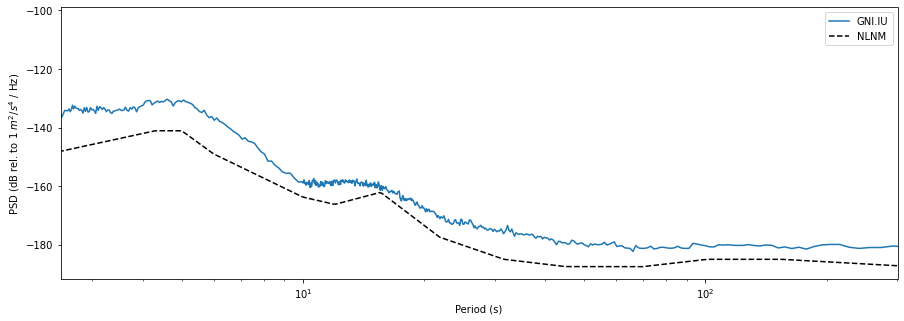

NWAO.IU


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

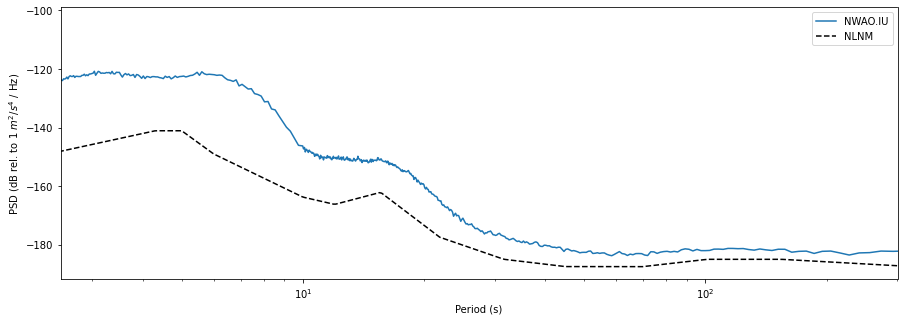

BBSR.IU


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

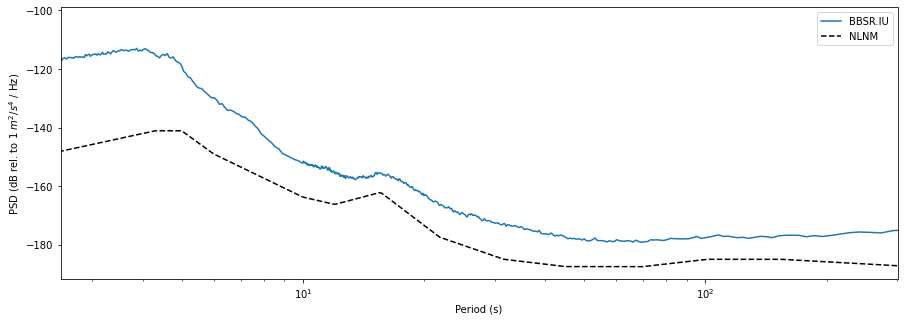

MA2.IU


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

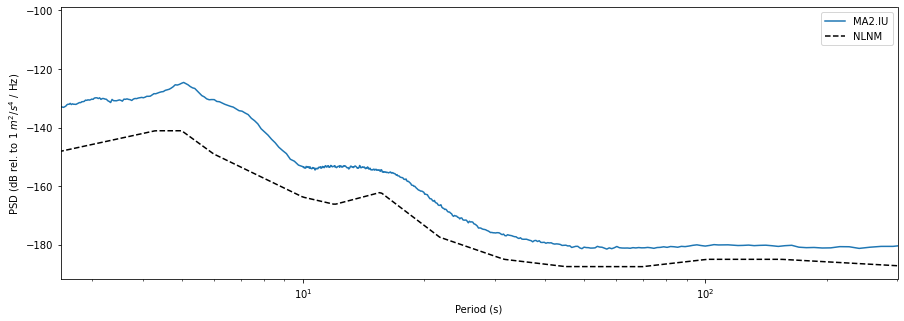

COLA.IU


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

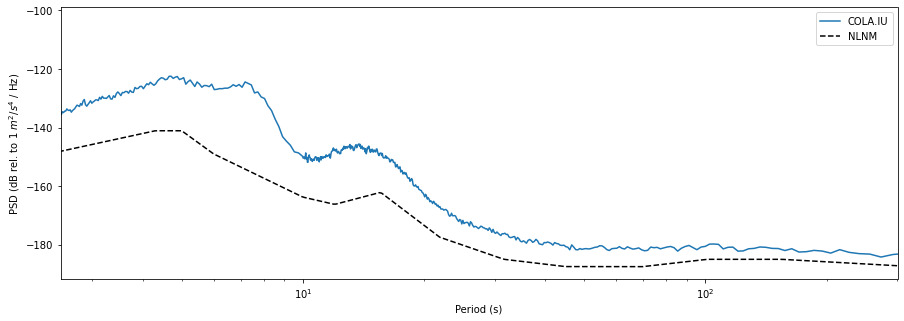

FURI.IU


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

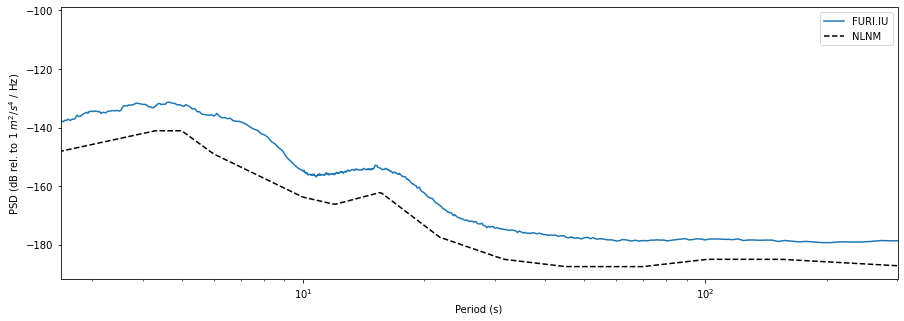

GUMO.IU


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

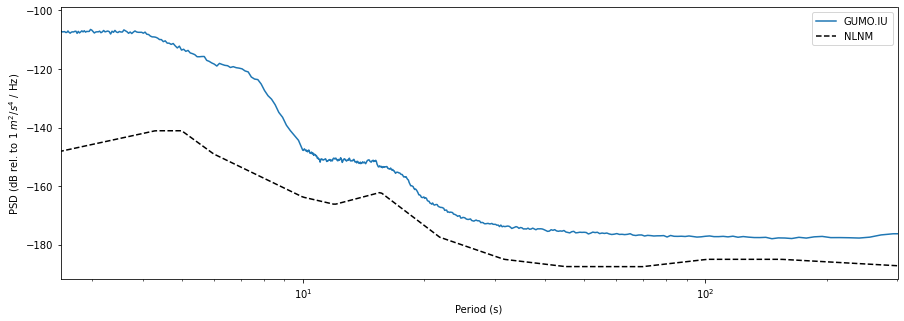

ECH.G


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

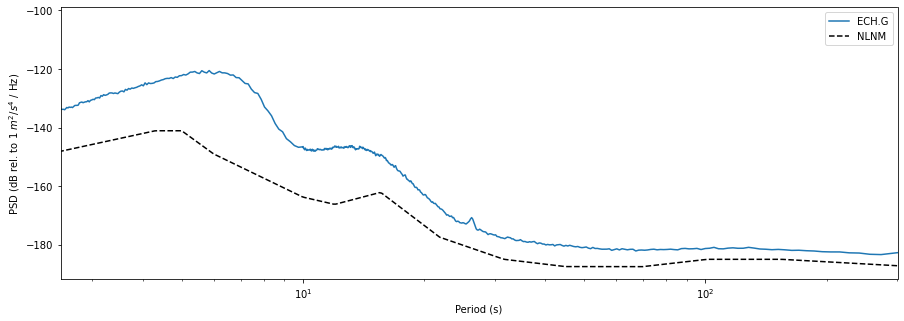

JOHN.IU


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

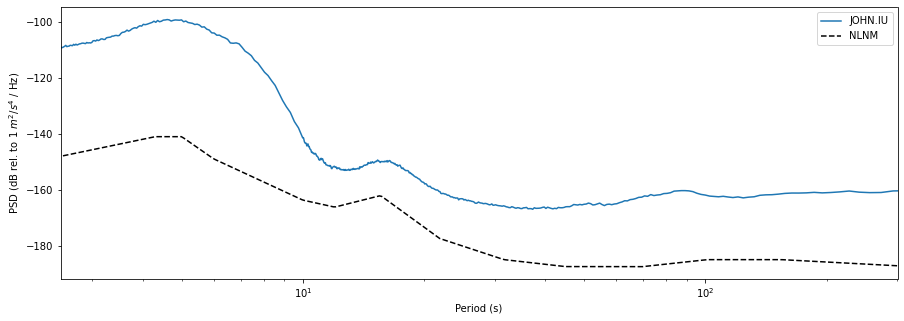

BILL.IU


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

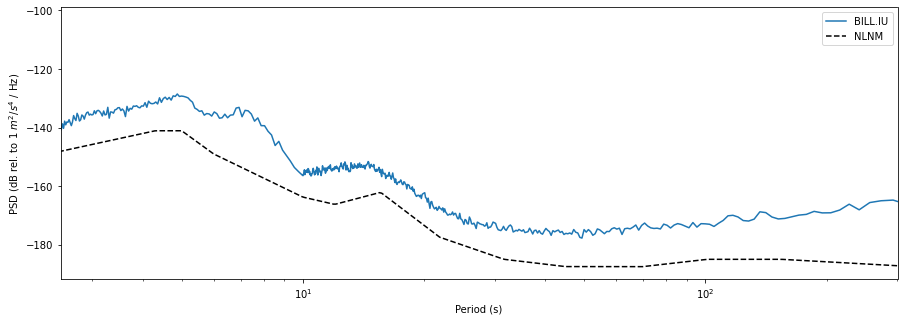

KMBO.IU


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

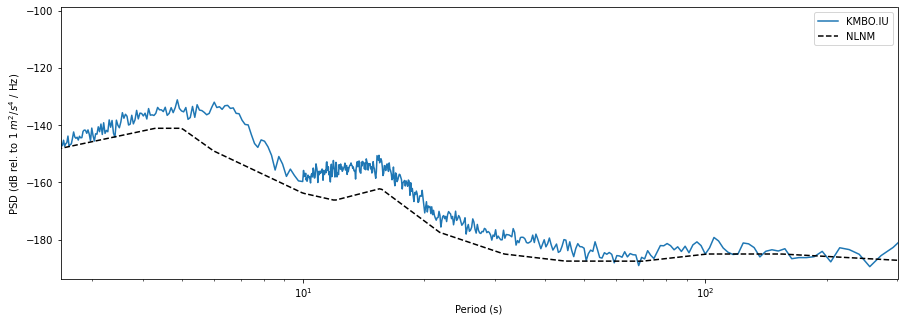

KIP.G


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

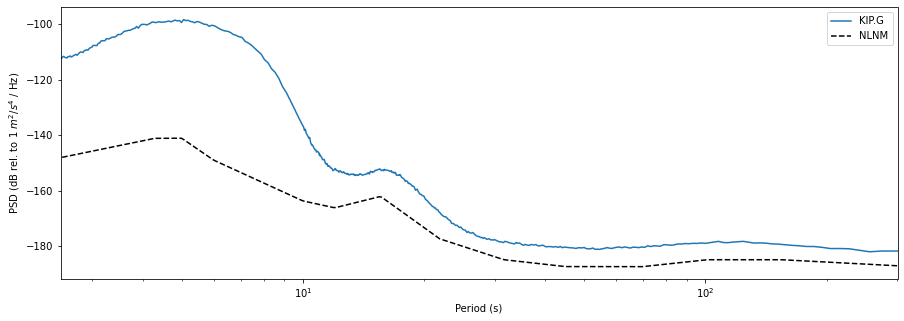

QSPA.IU


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

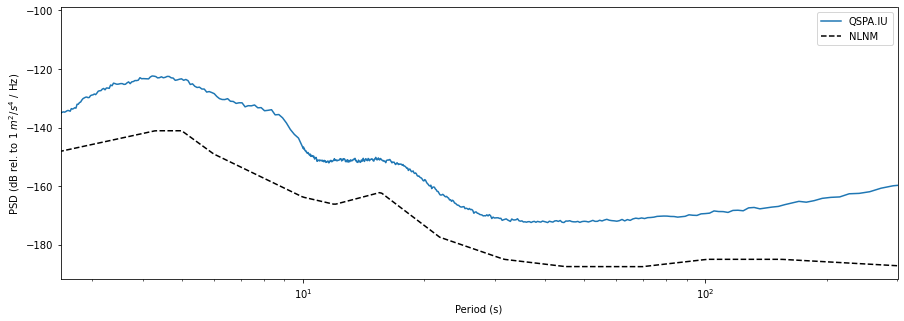

KEV.IU


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

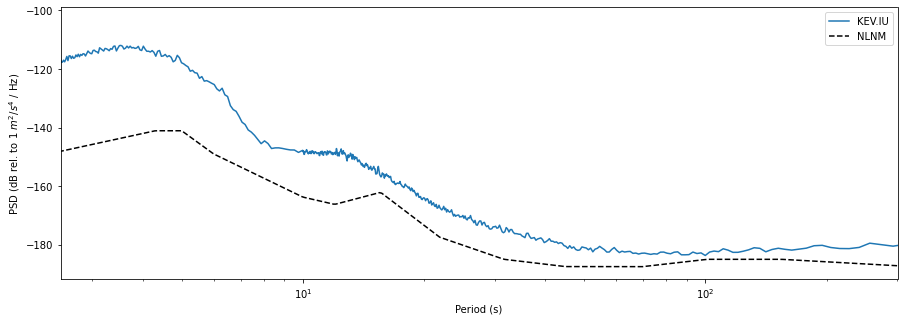

DAV.IU


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

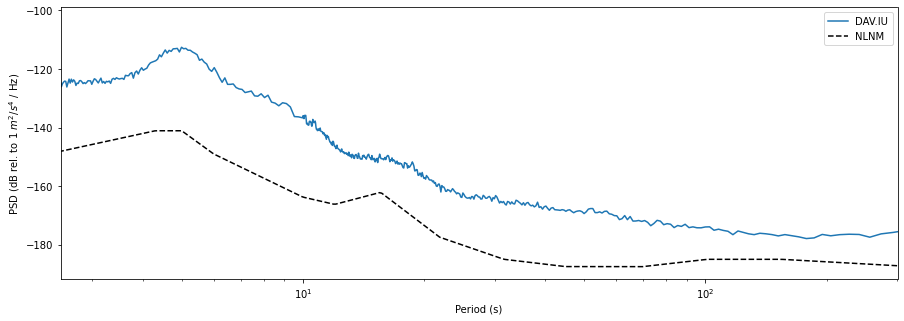

KONO.IU


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

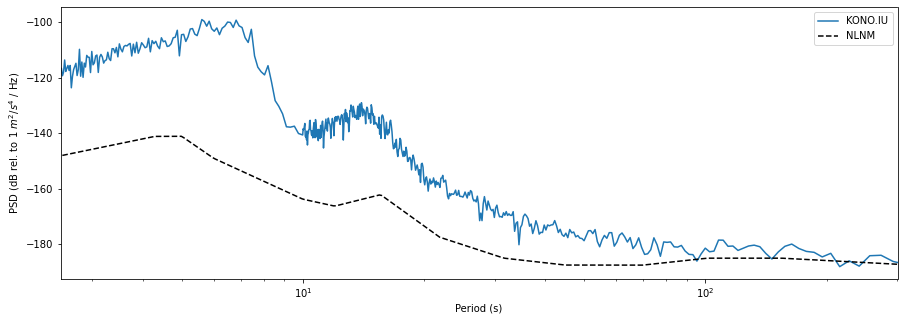

BORG.II


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

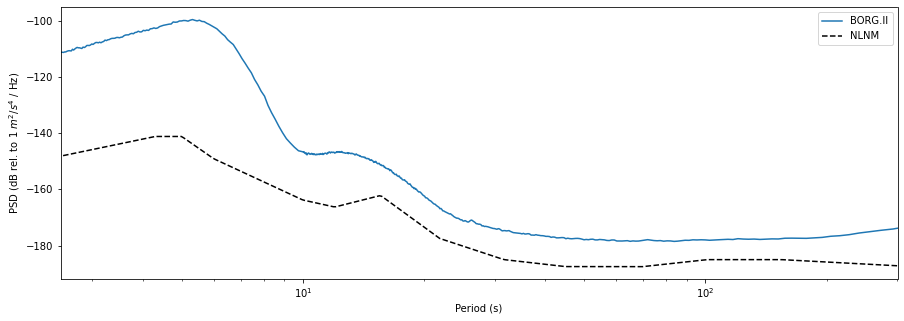

FFC.II


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

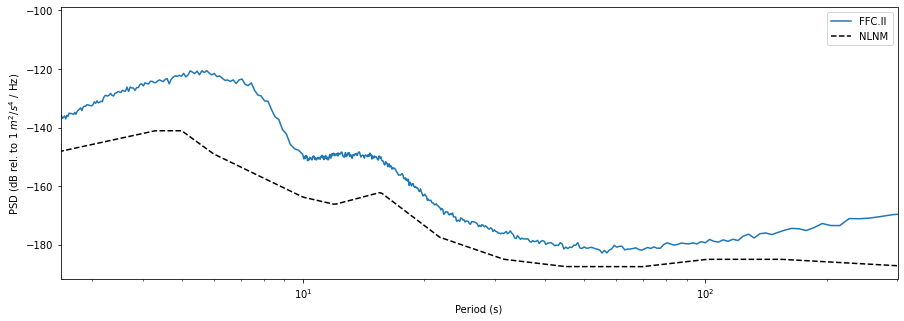

WCI.IU


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

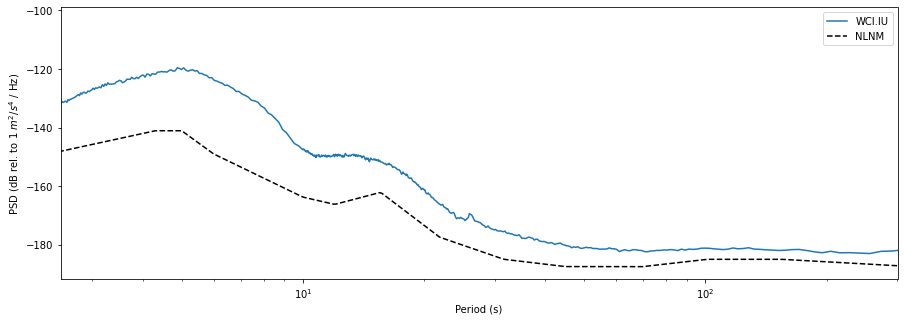

WUS.G


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

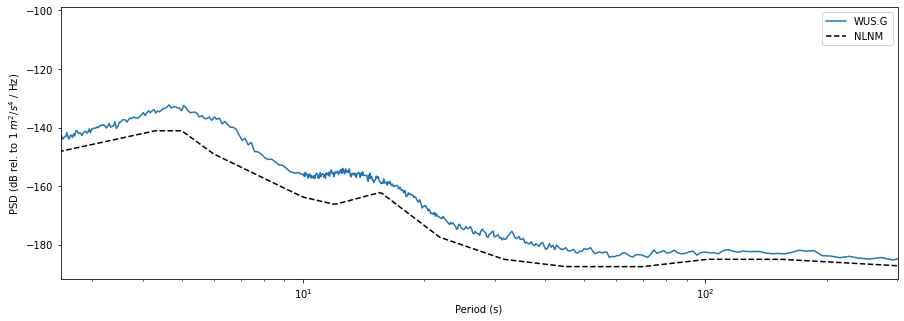

KDAK.II


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

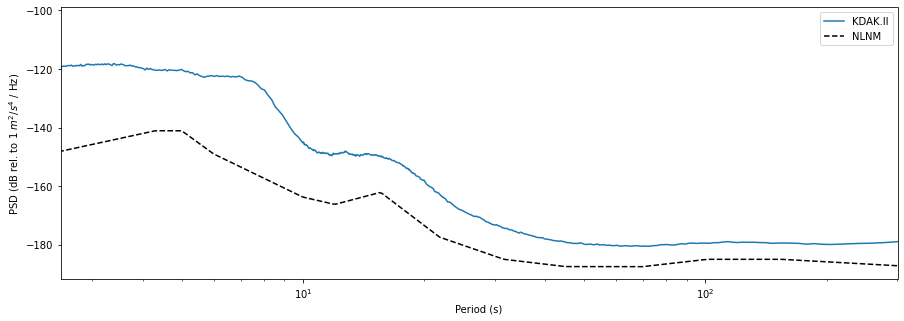

HRV.IU


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

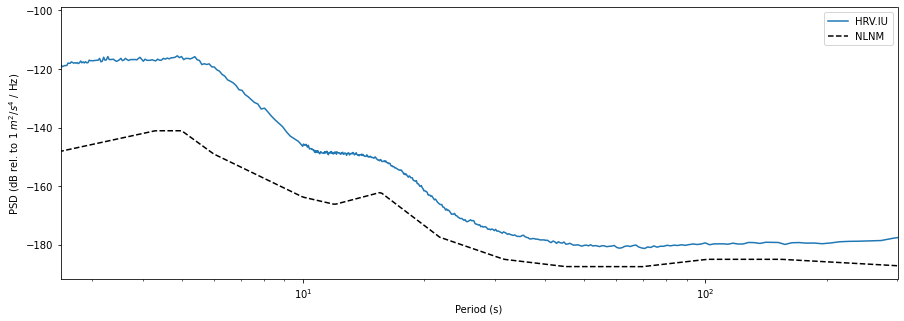

MAJO.IU


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

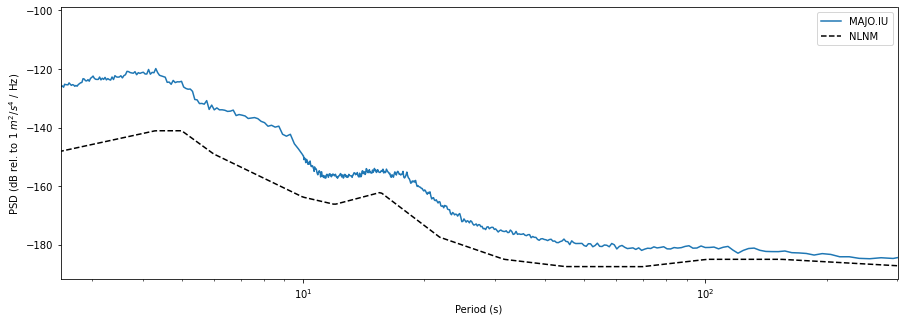

RER.G


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

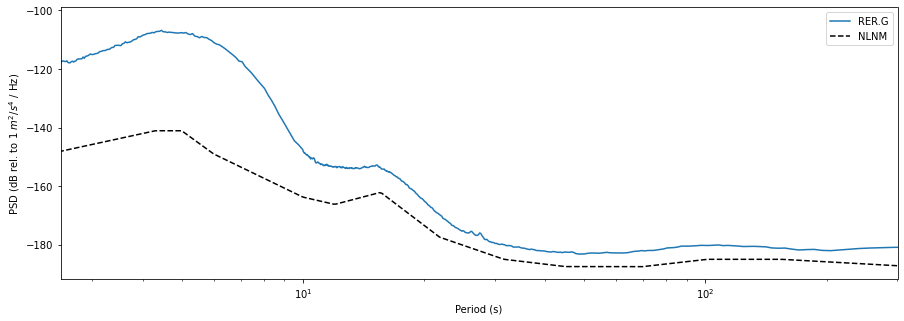

CTAO.IU


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

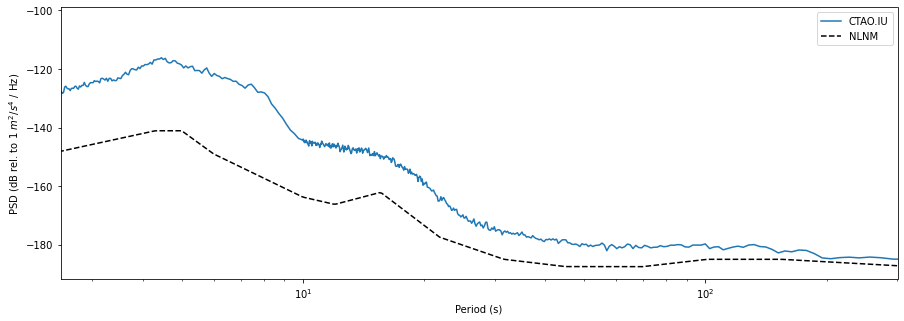

RCBR.IU


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

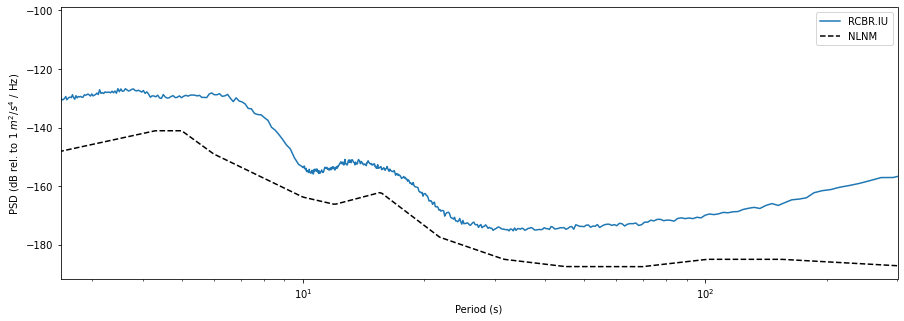

ATD.G


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

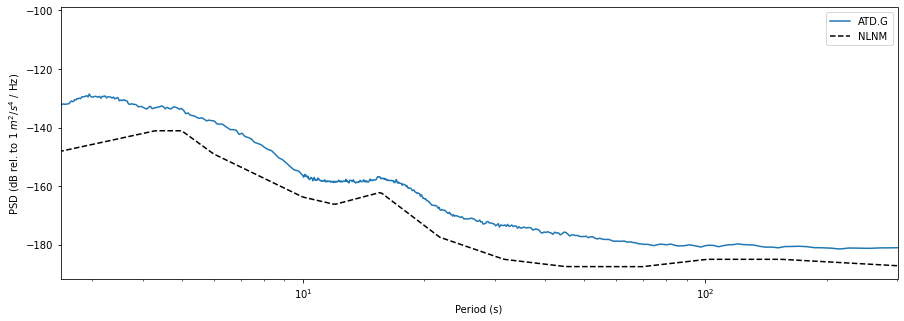

FDF.G


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

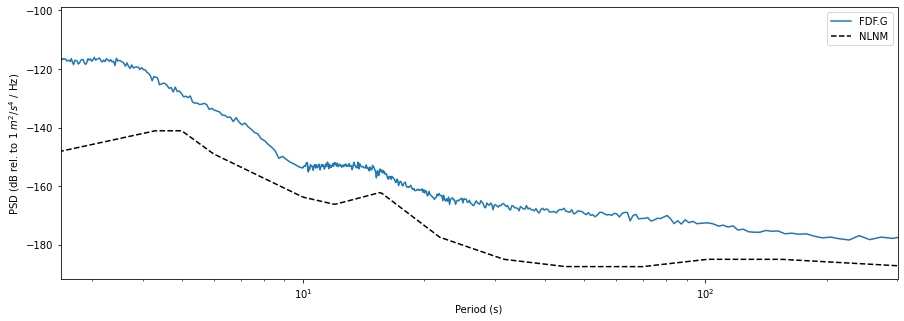

MBWA.IU


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

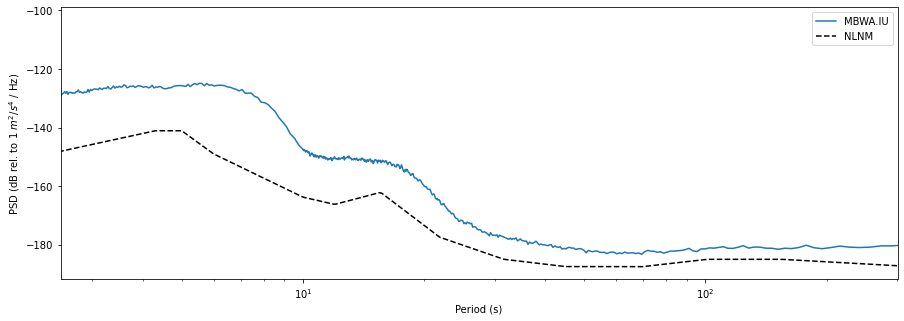

CCM.IU


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

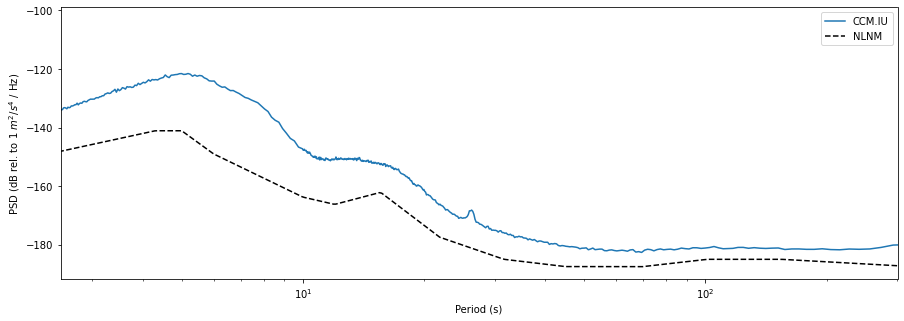

SLBS.IU


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

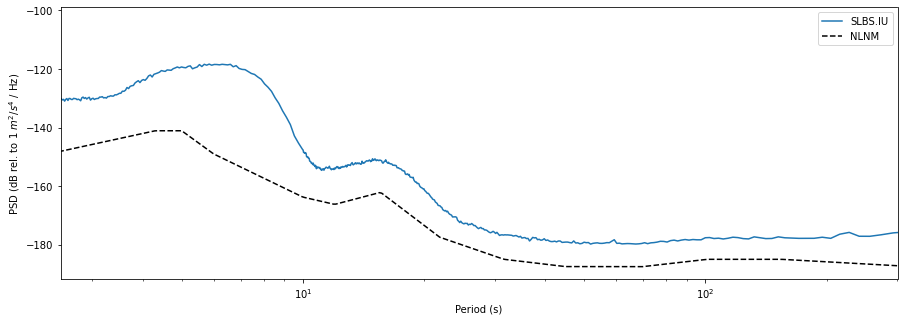

ANMO.IU


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

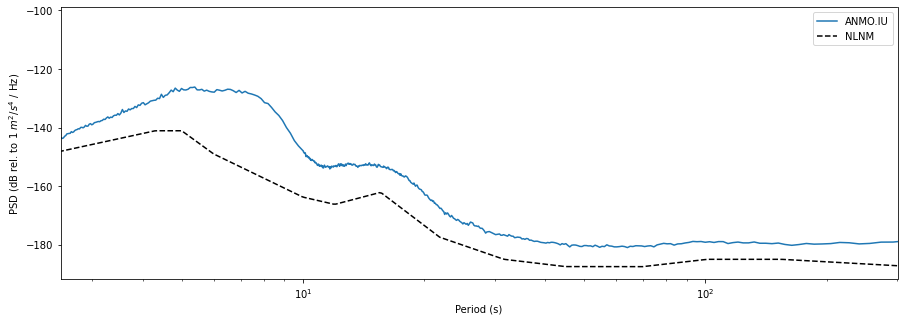

NOUC.G


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

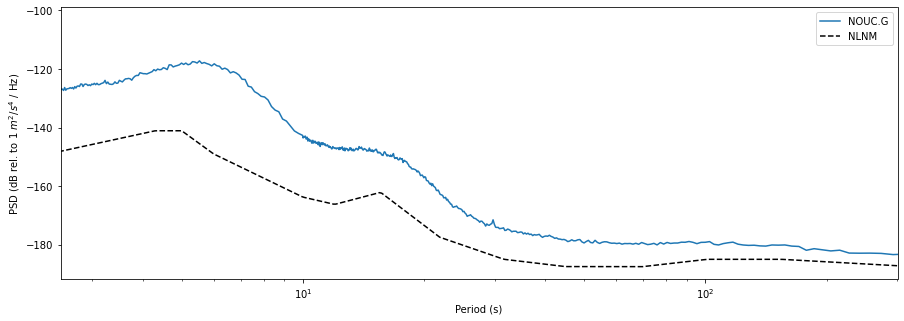

KURK.II


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

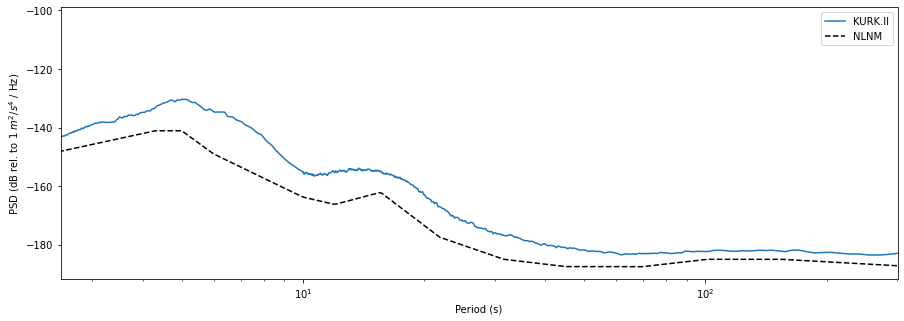

TIXI.IU


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

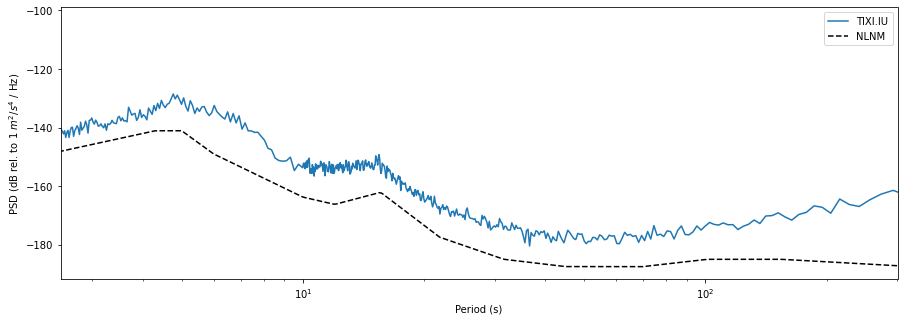

SFJD.IU


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

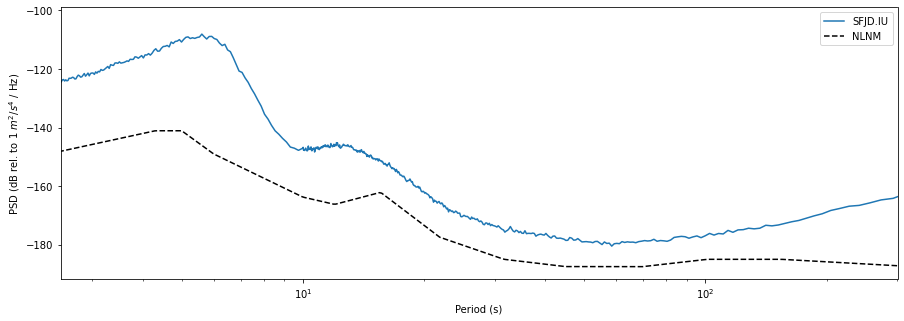

FUNA.IU


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

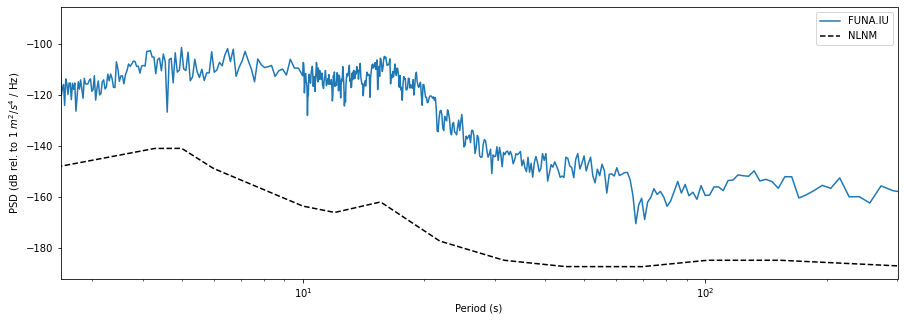

ULN.IU


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

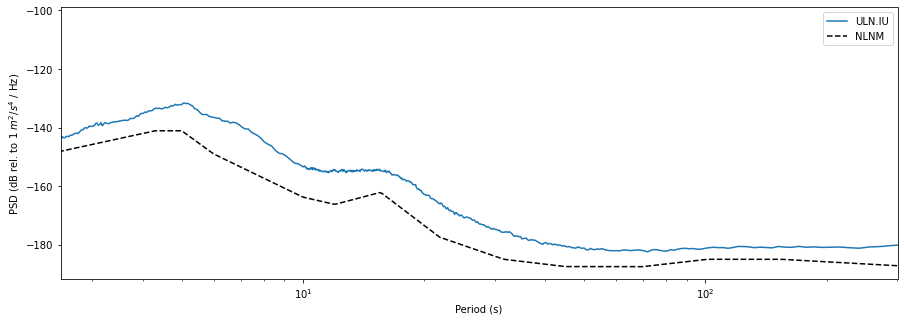

WAKE.IU


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

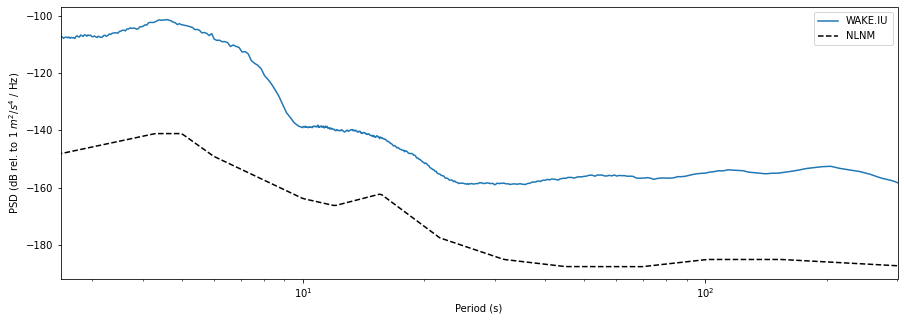

PAF.G


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

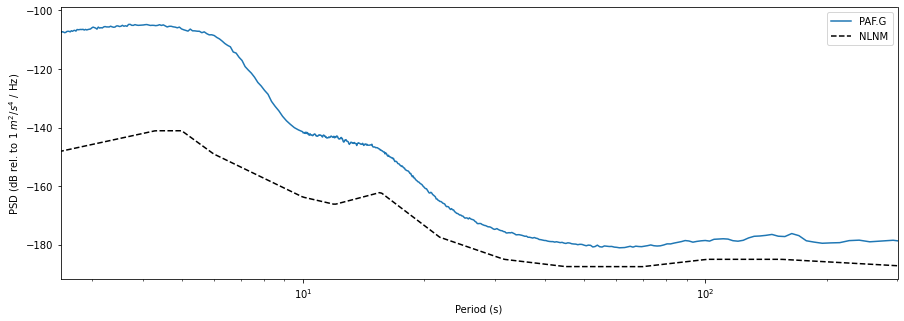

BRVK.II


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

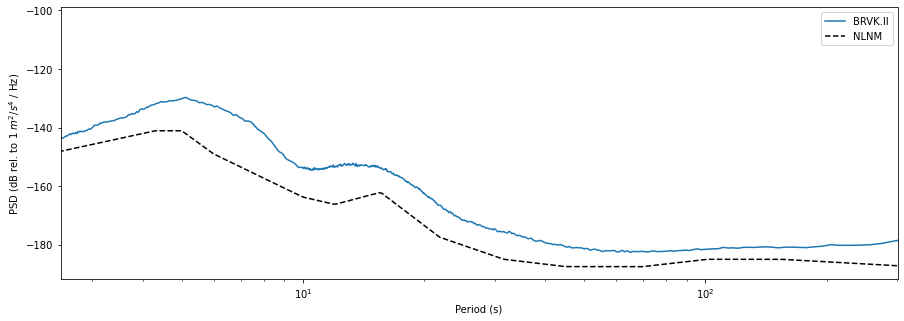

ABPO.II


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

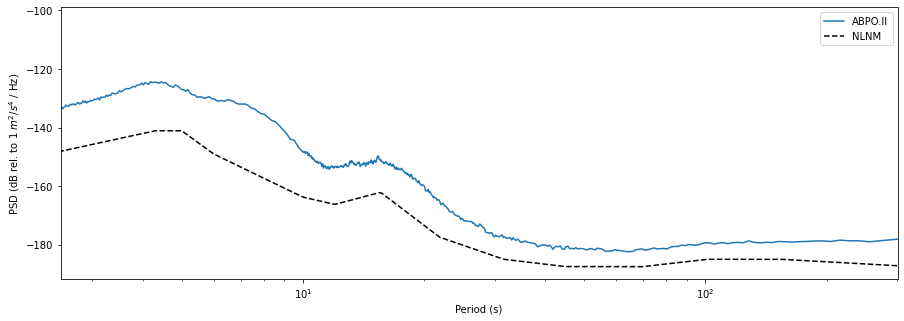

KBS.IU


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

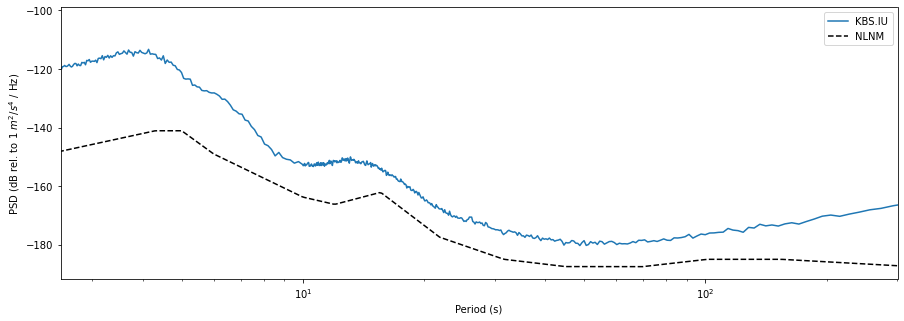

MSEY.II


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

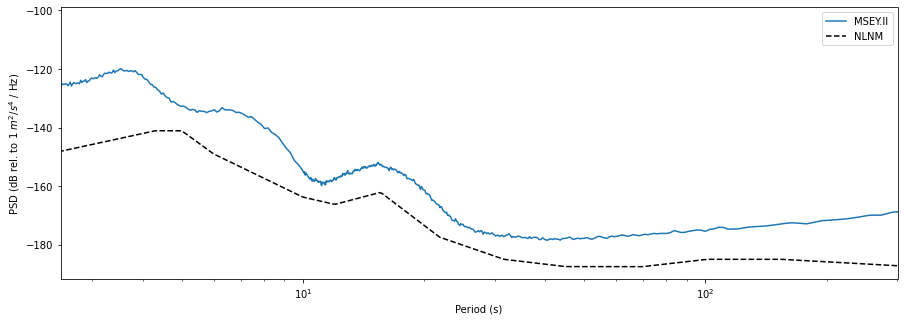

CHTO.IU


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

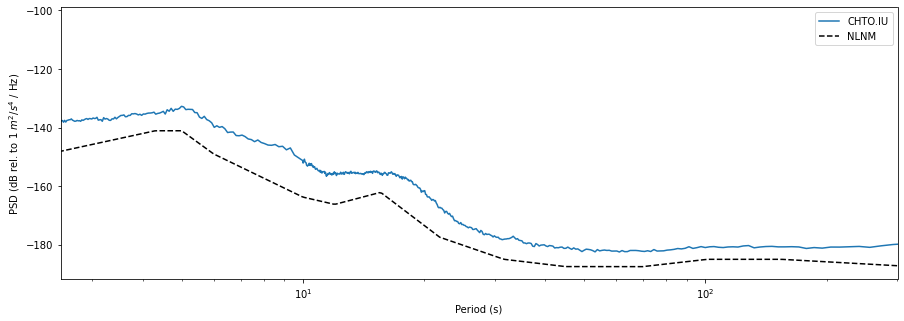

DGAR.II


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

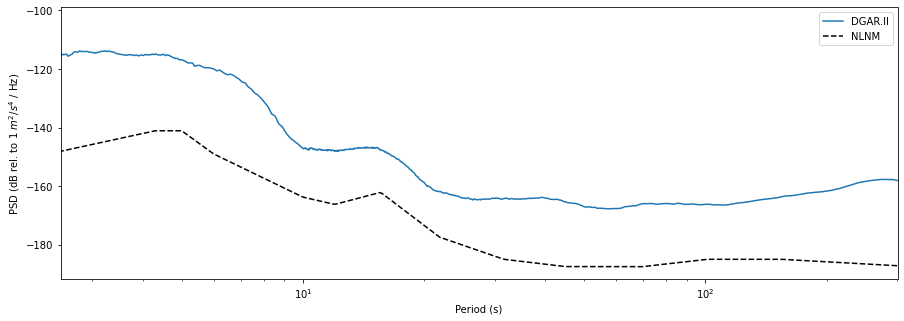

HOPE.II


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

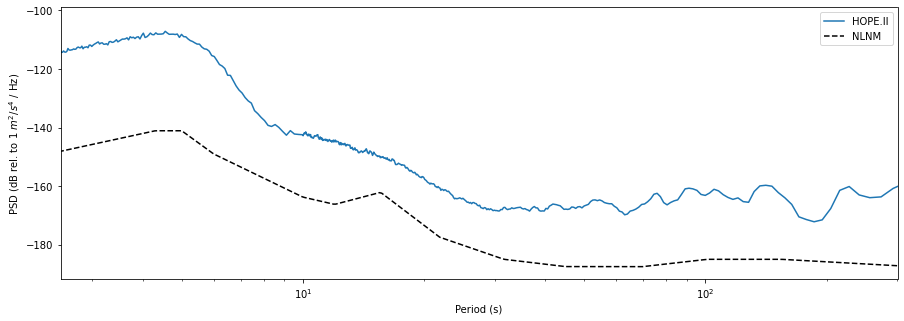

TUC.IU


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

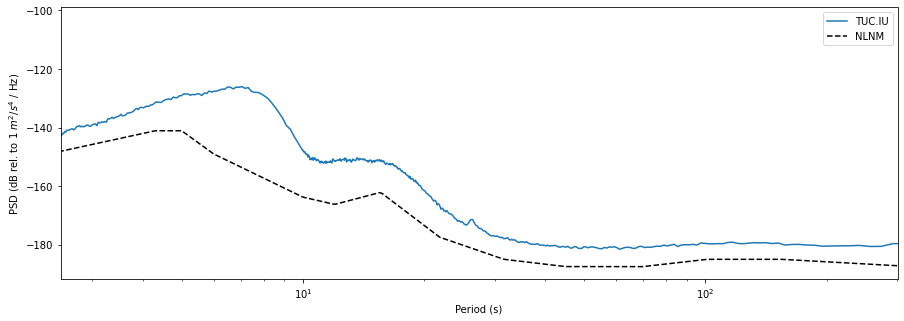

HNR.IU


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

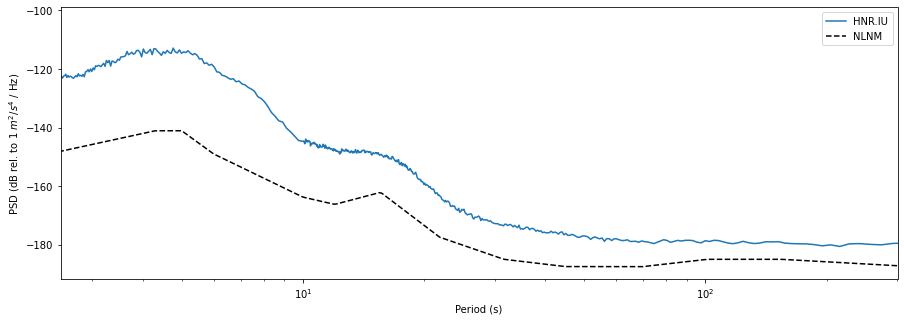

CMLA.II


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

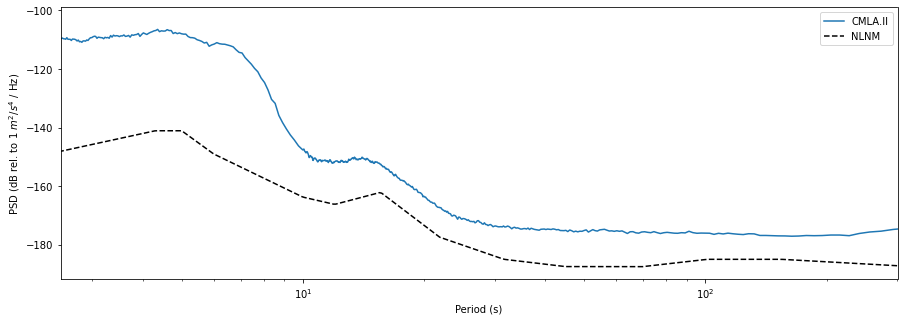

ESK.II


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

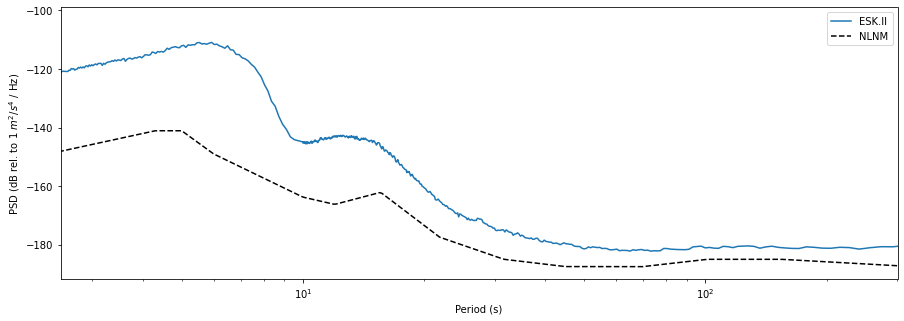

ANTO.IU


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

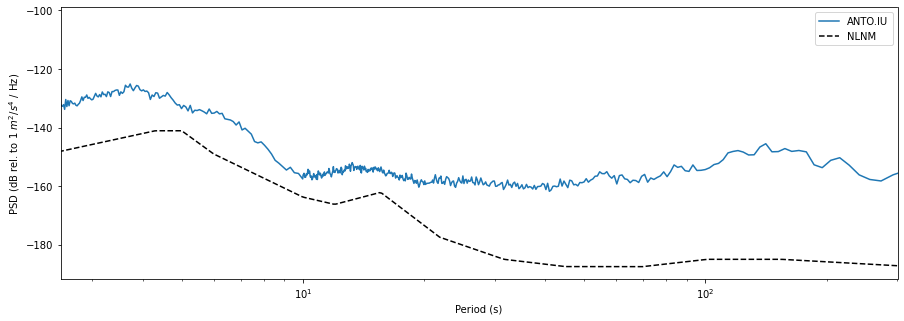

RAR.IU


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

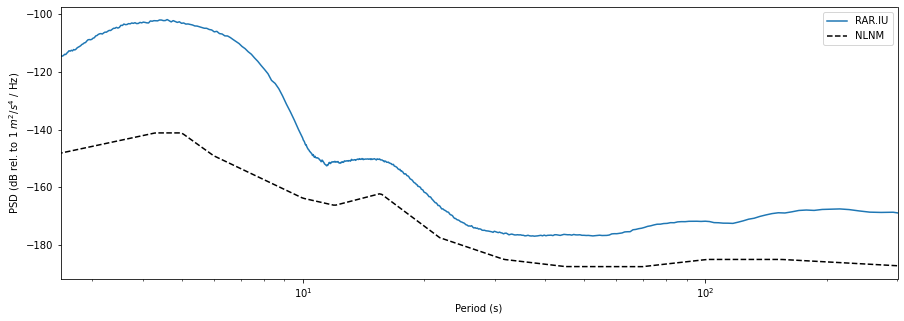

PEL.G


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

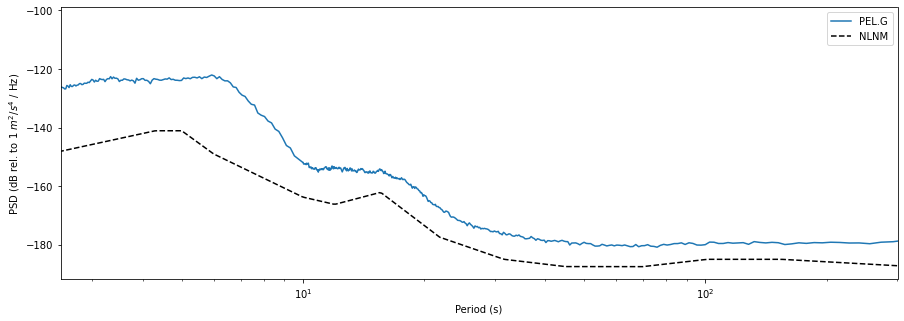

ADK.IU


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

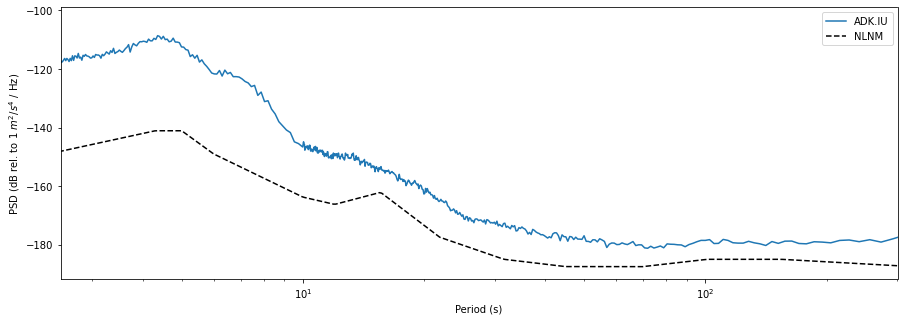

RSSD.IU


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

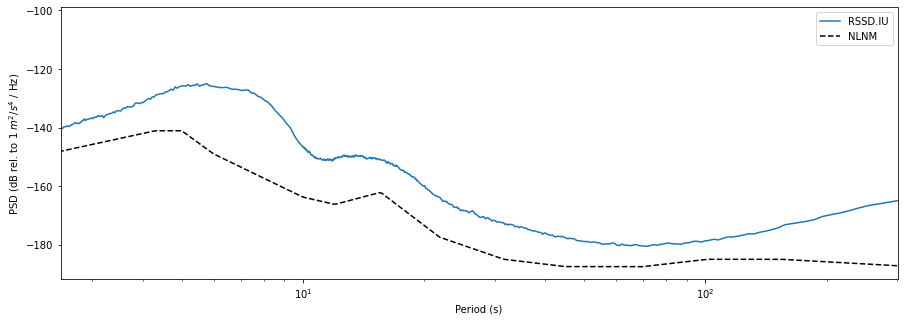

ERM.II


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

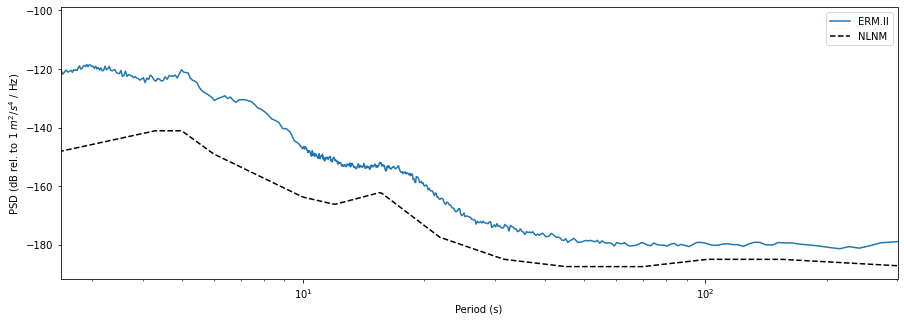

PET.IU


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

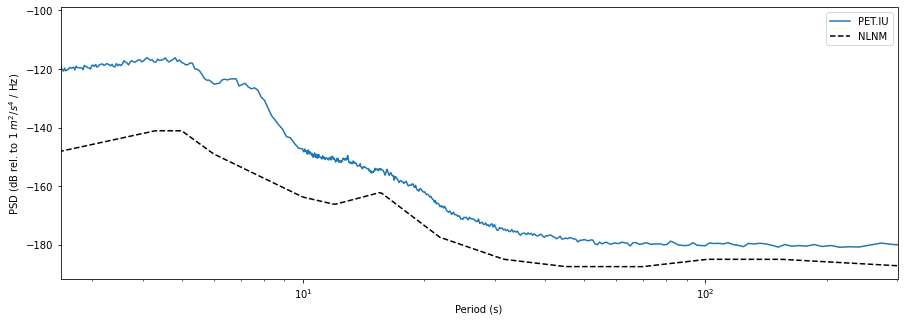

CAN.G


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

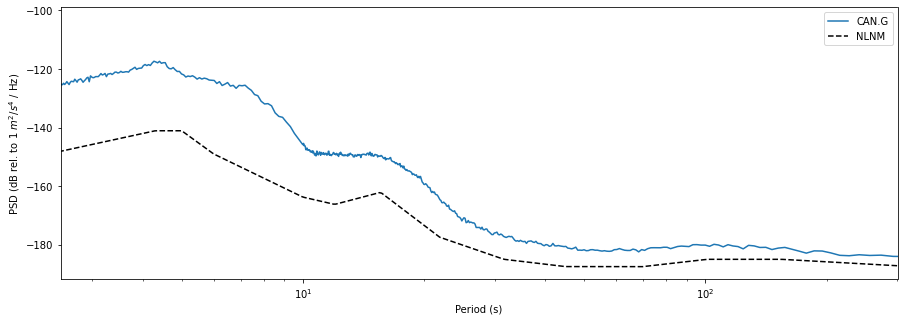

INCN.IU


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

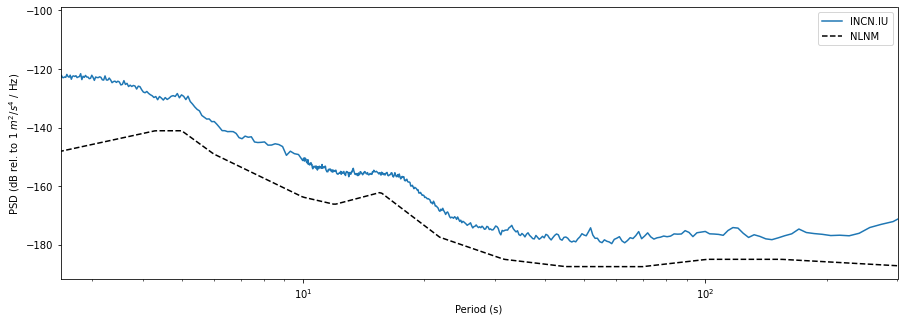

CASY.IU


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

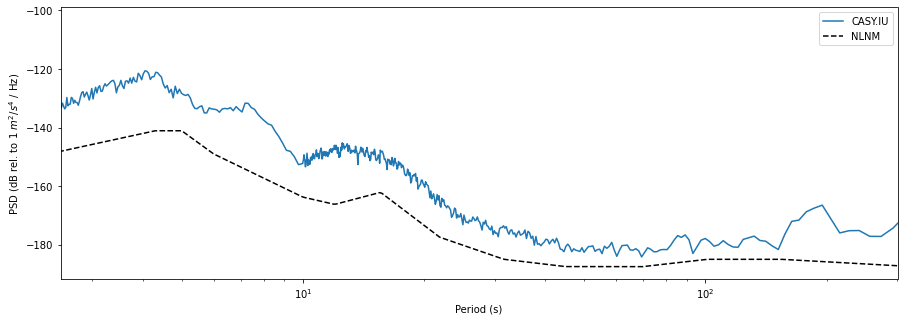

COCO.II


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

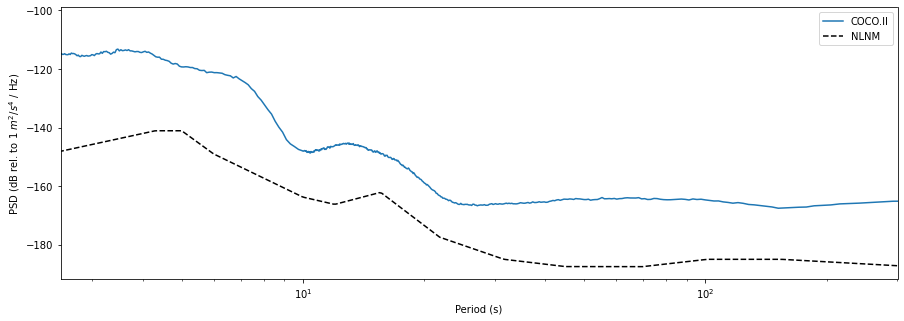

HDC.G


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

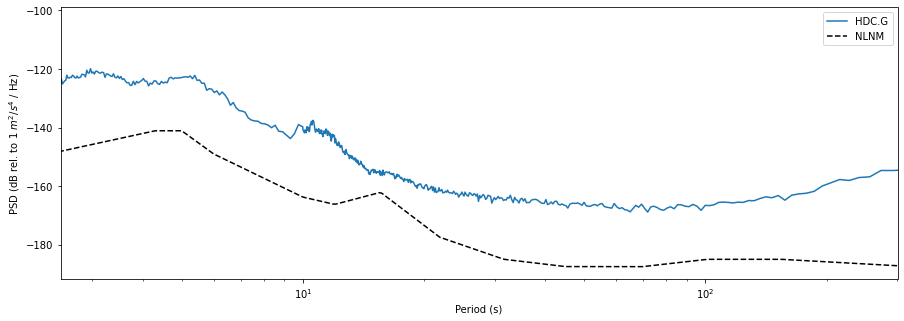

LCO.IU


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

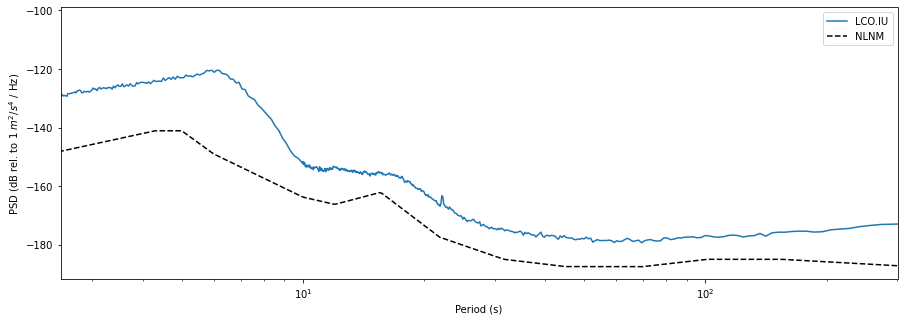

ARTI.II


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

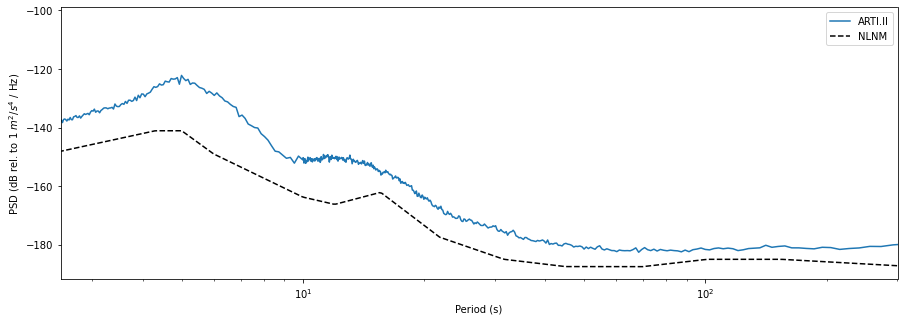

PAYG.IU


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

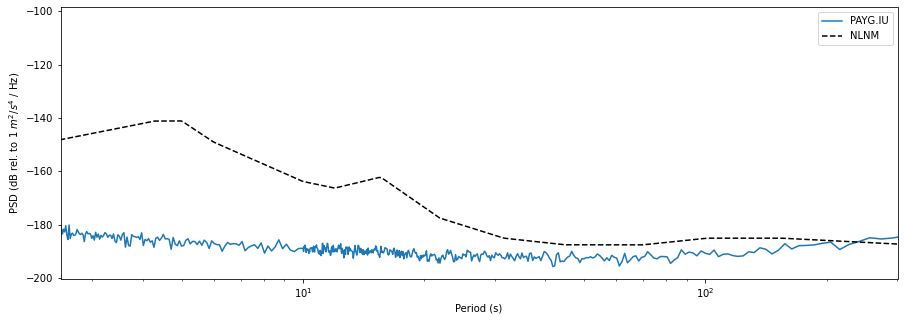

KWJN.II


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

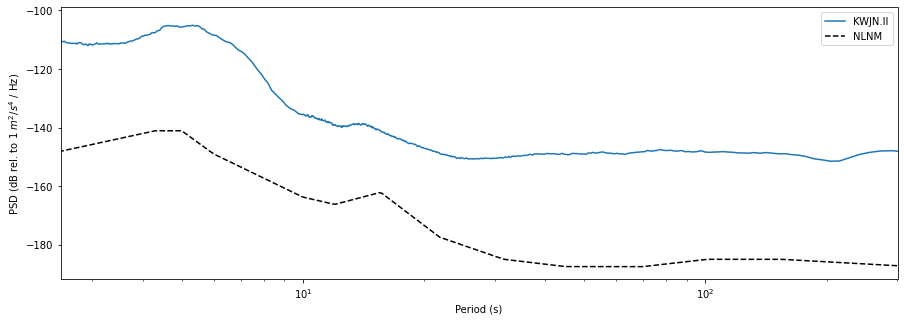

PTCN.IU


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

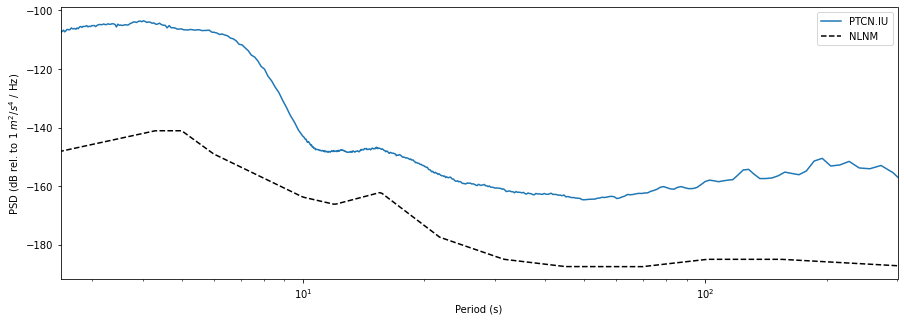

COYC.G


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

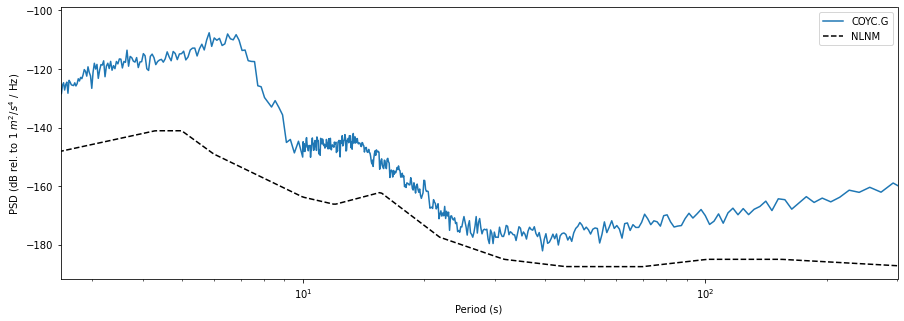

SSB.G


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

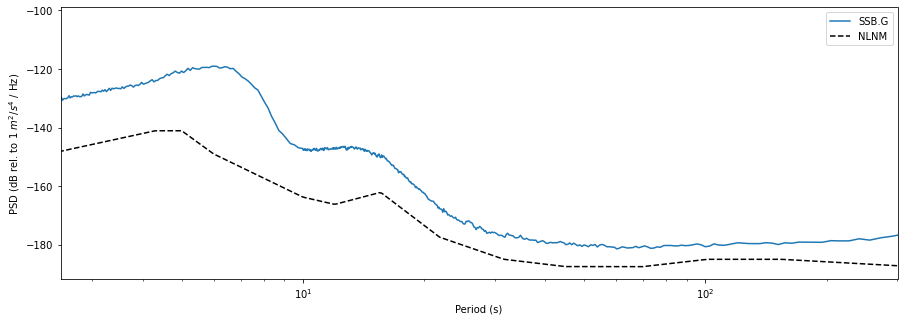

AFI.IU


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

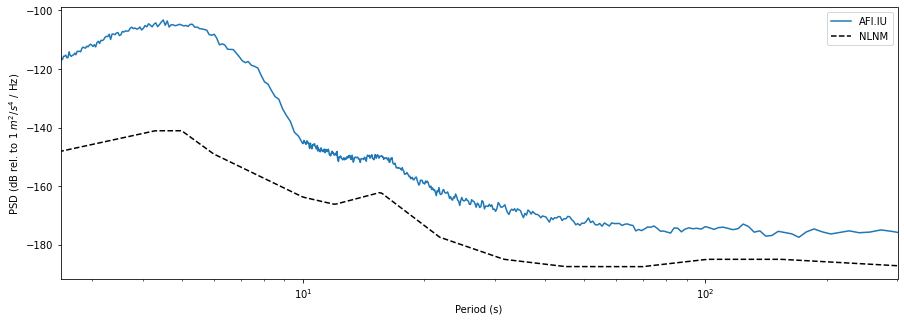

CLF.G


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

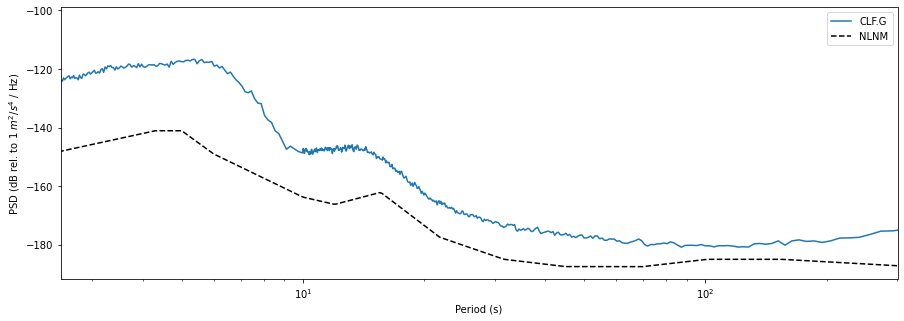

COR.IU


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

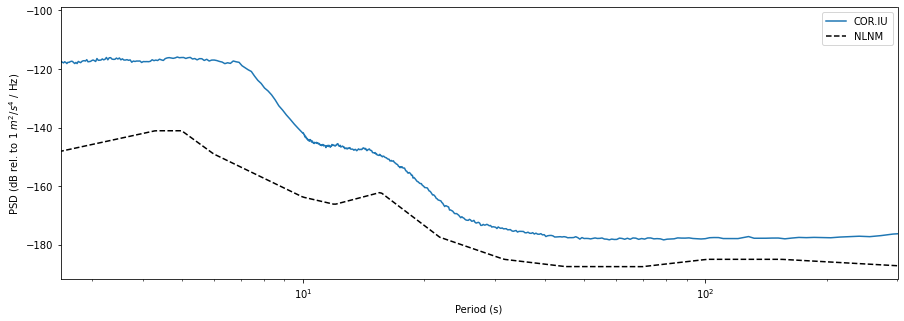

ASCN.II


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

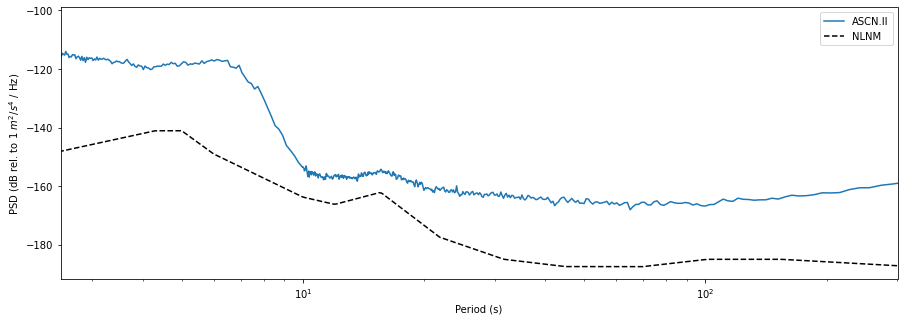

EFI.II


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

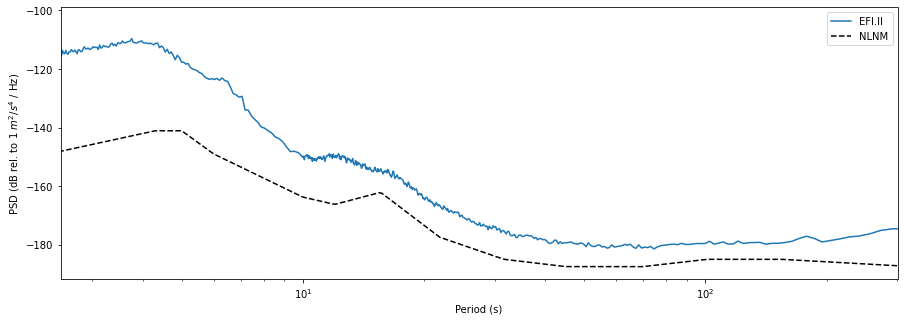

SJG.IU


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

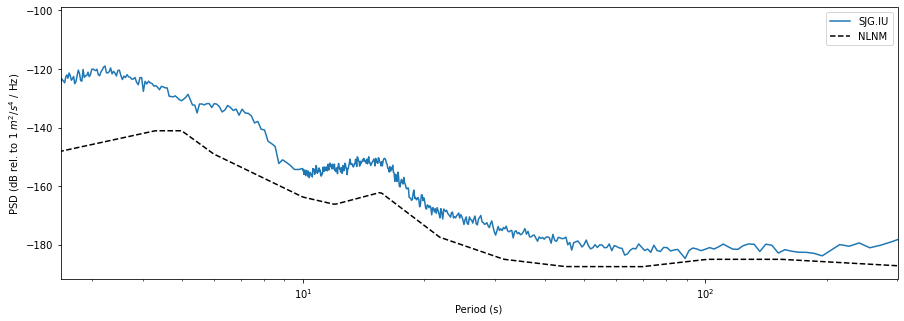

SDV.IU


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

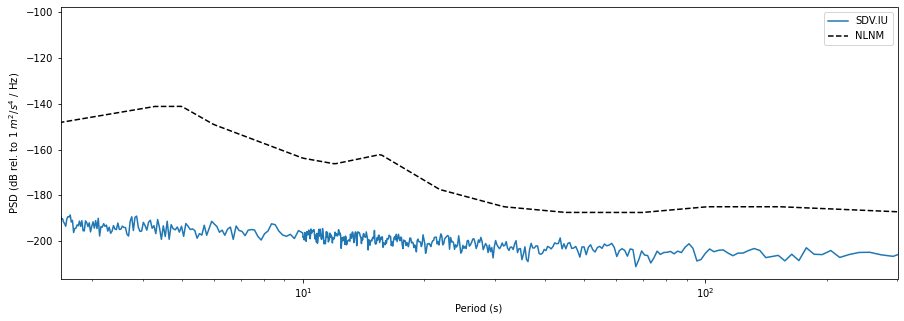

RAO.IU


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

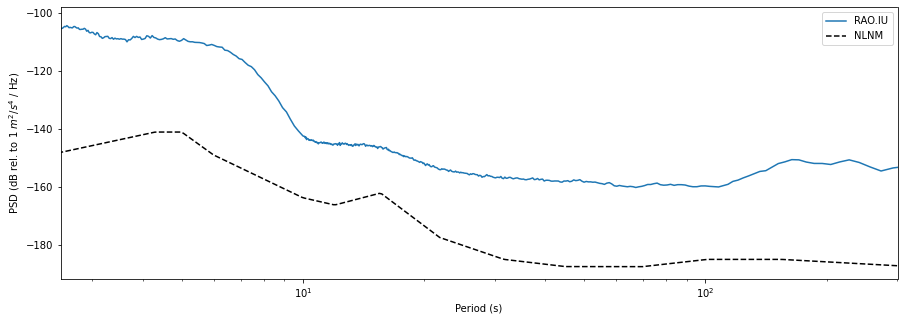

JTS.II


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

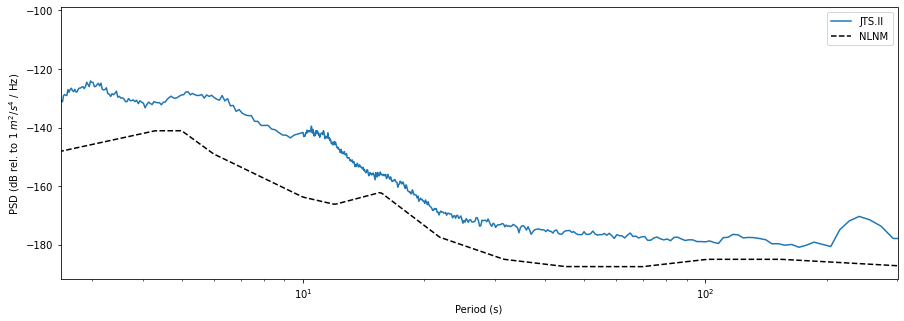

MBAR.II


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

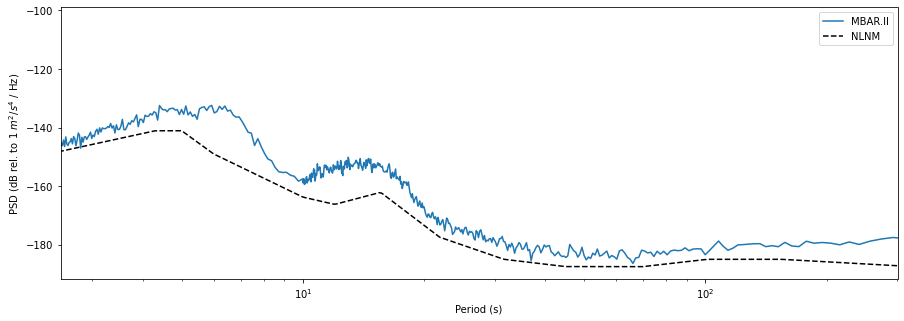

SNZO.IU


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

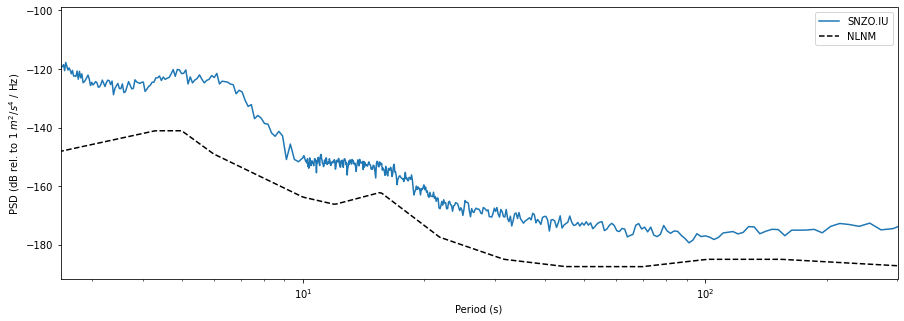

PMG.IU


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

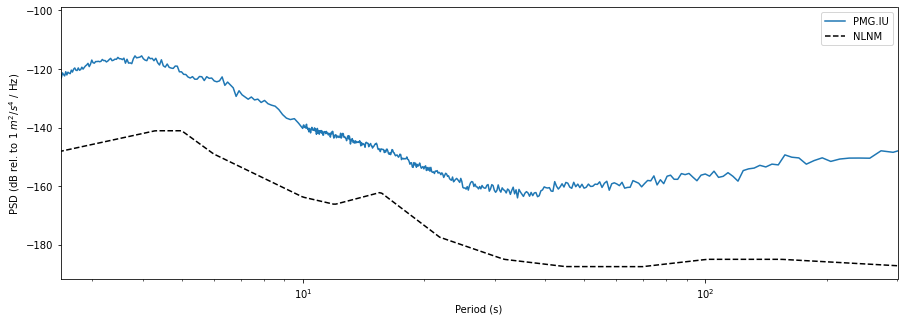

TRIS.G


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

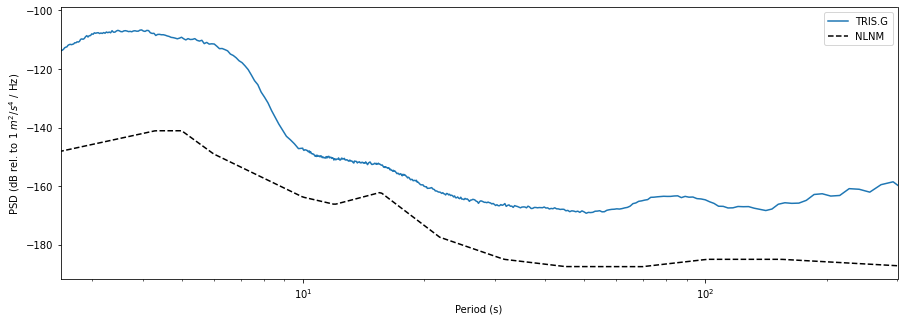

TEIG.IU


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

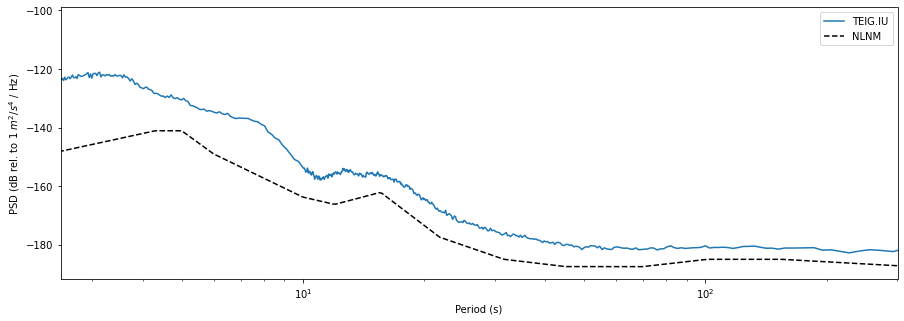

PAB.IU


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

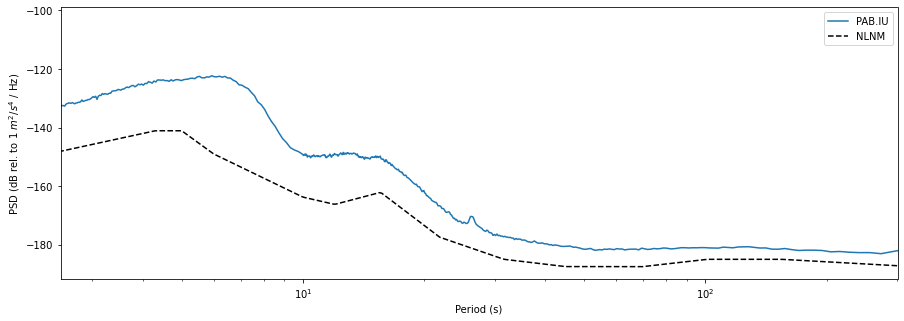

DWPF.IU


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

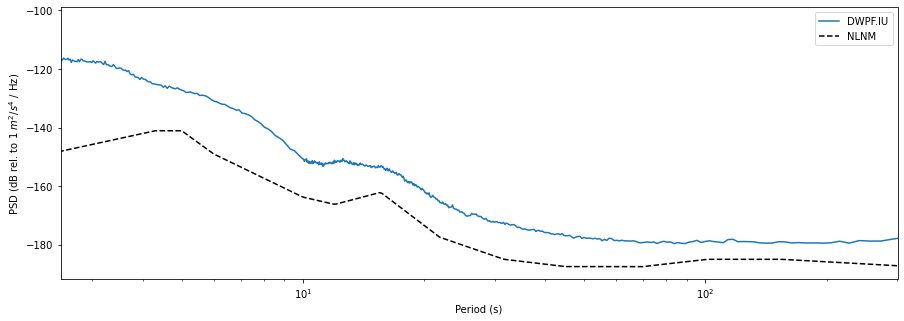

TRQA.IU


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

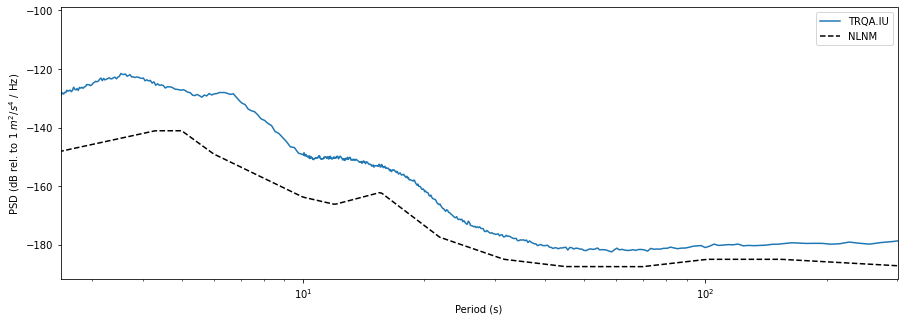

OTAV.IU


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

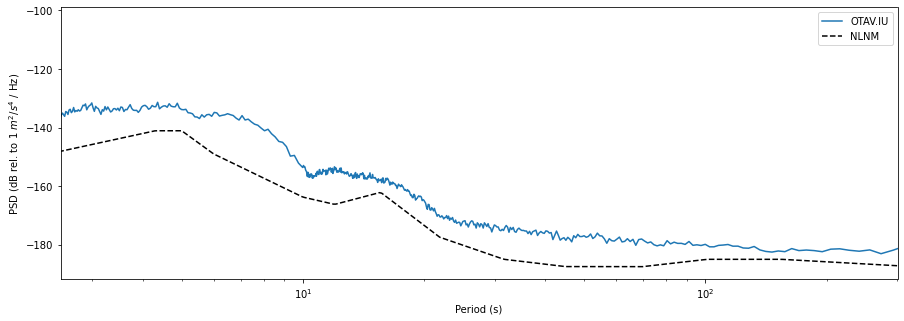

KIP.IU


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

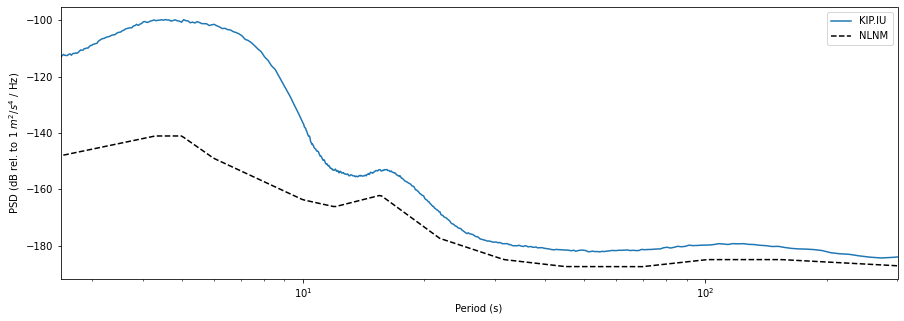

LSZ.IU


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

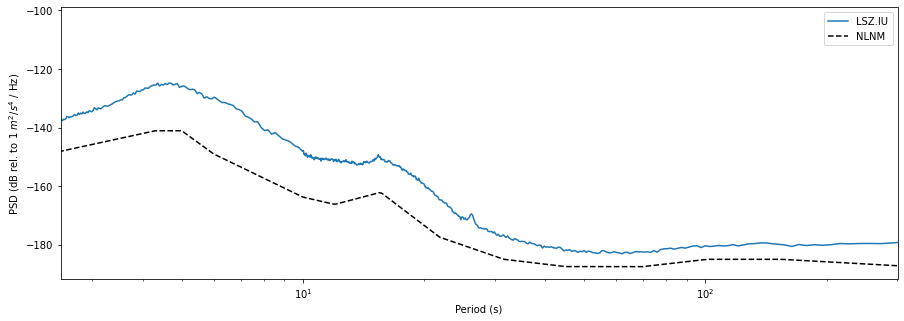

TSUM.IU


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

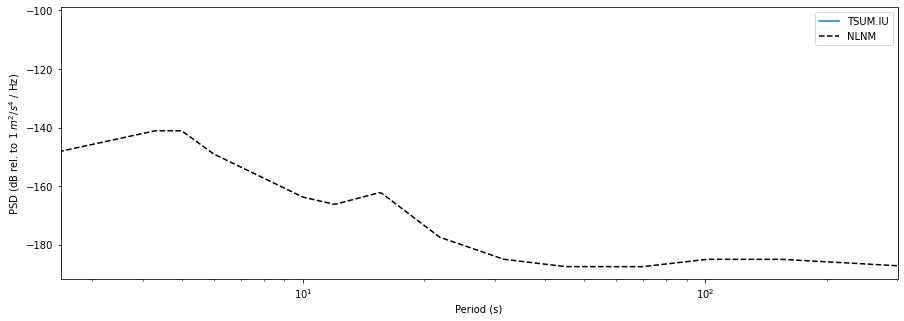

PMSA.IU


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

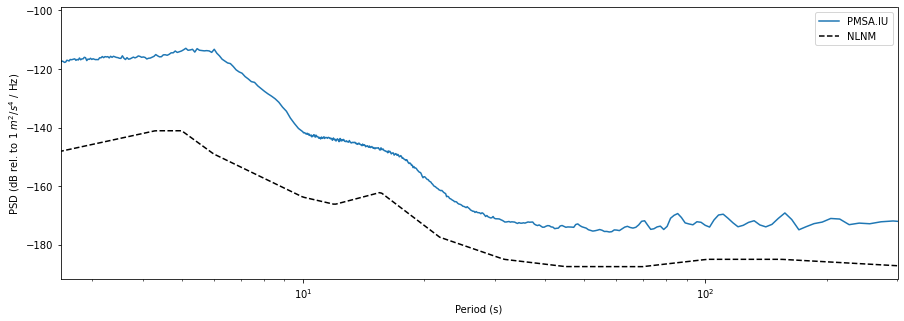

SBA.IU


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

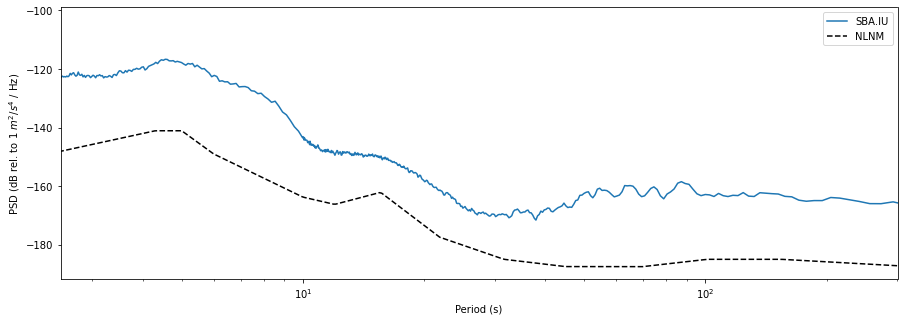

YSS.IU


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

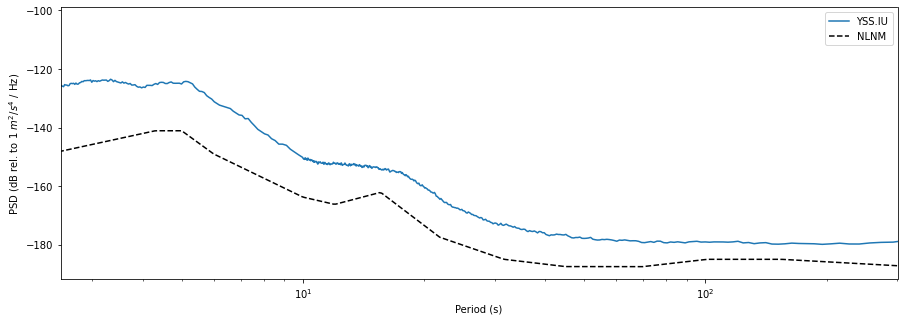

GRFO.IU


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

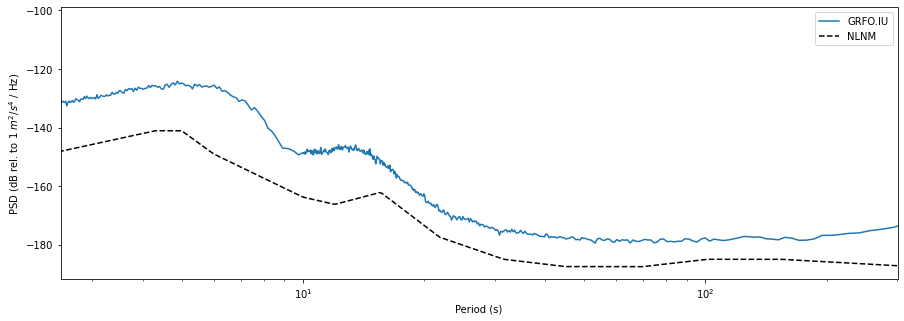

ALE.II


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

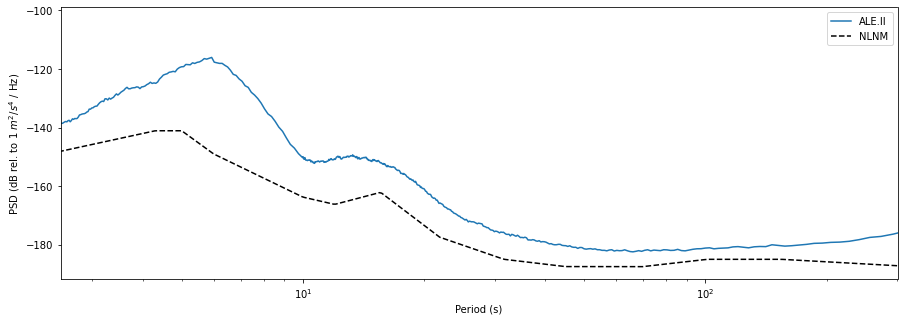

PPTF.G


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

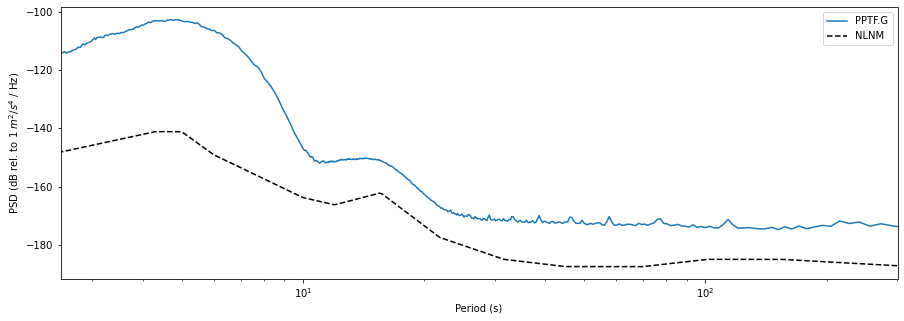

AAK.II


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

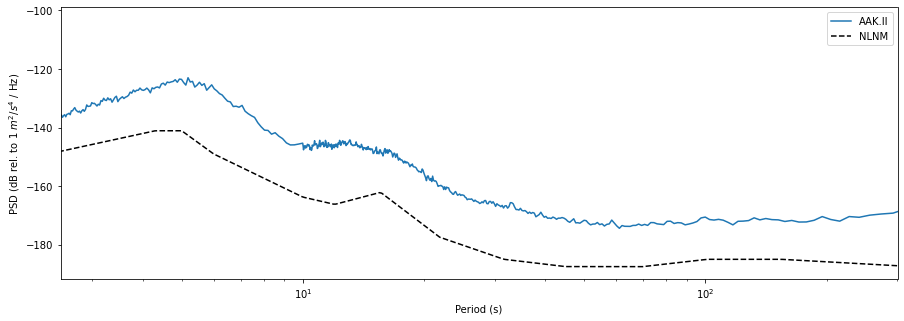

KIEV.IU


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

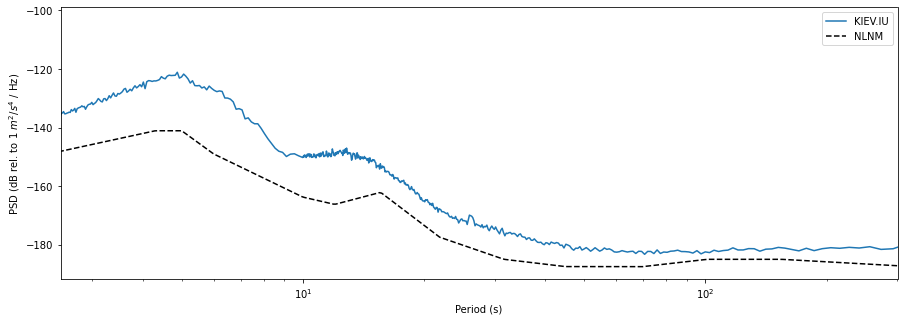

WVT.IU


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

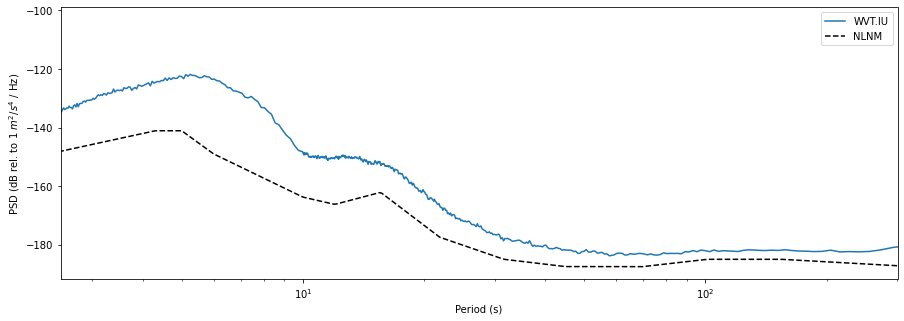

ROCAM.G


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

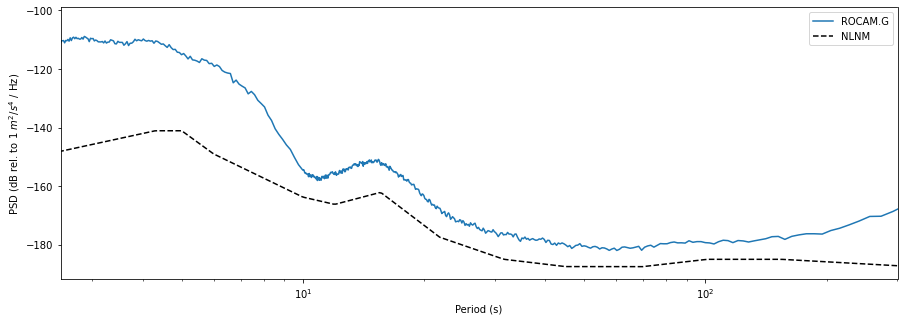

POHA.IU


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

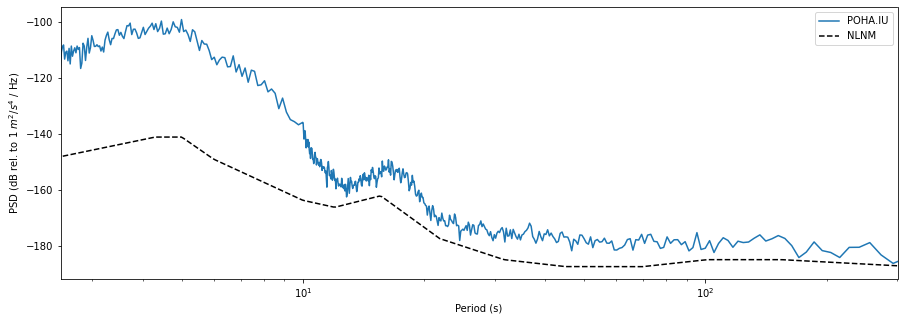

YAK.IU


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

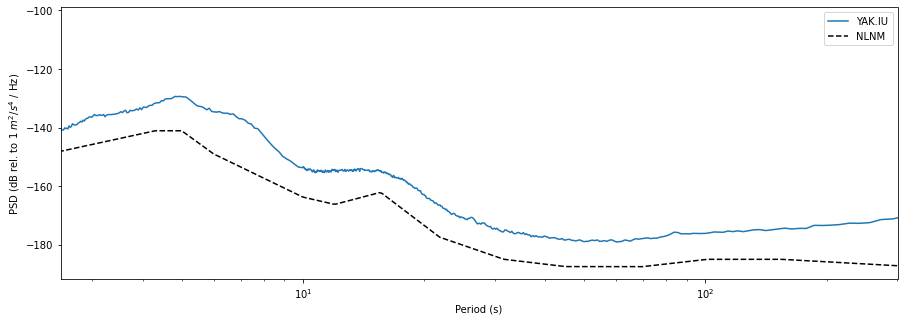

TARA.IU


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

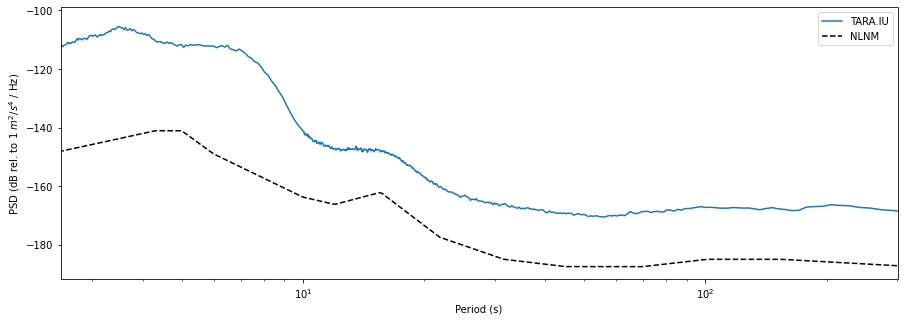

SSPA.IU


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

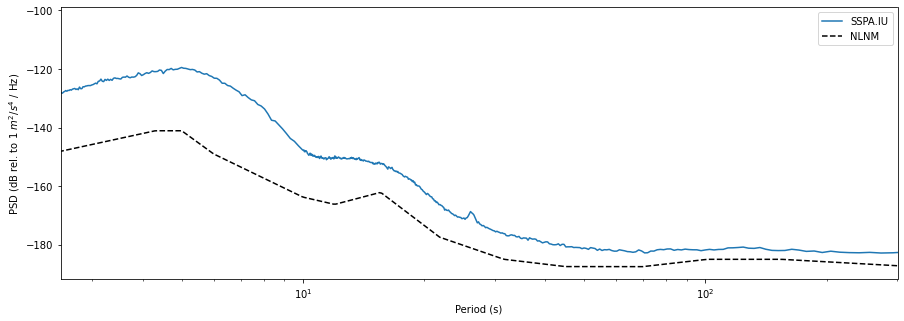

SPB.G


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

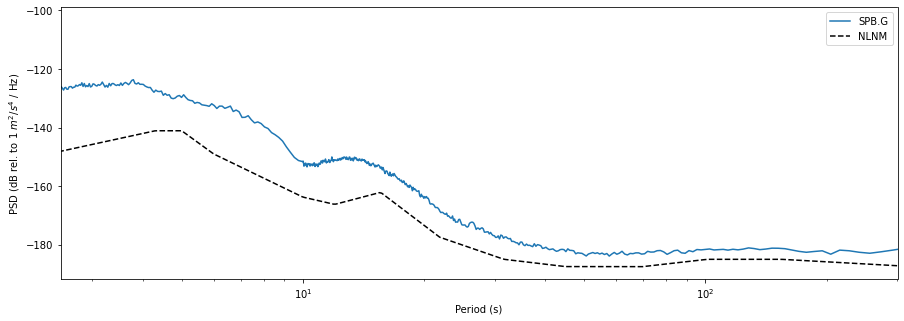

HKT.IU


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

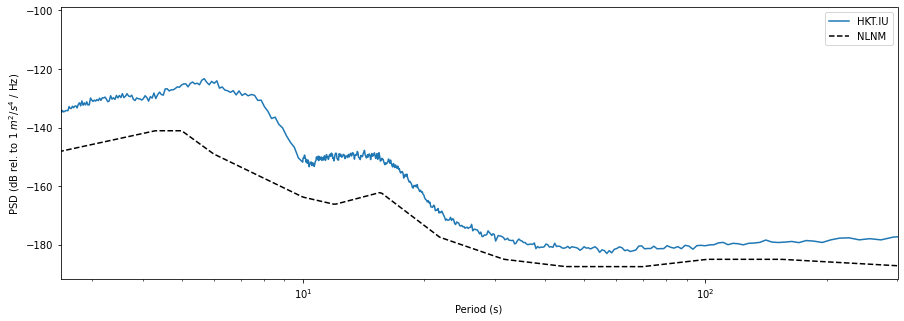

MPG.G


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

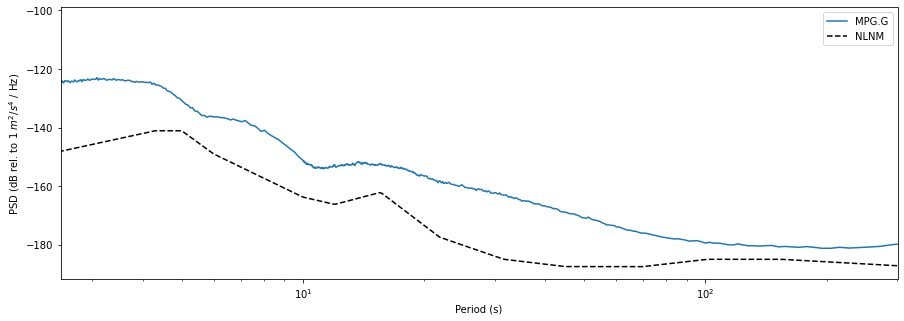

MIDW.IU


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

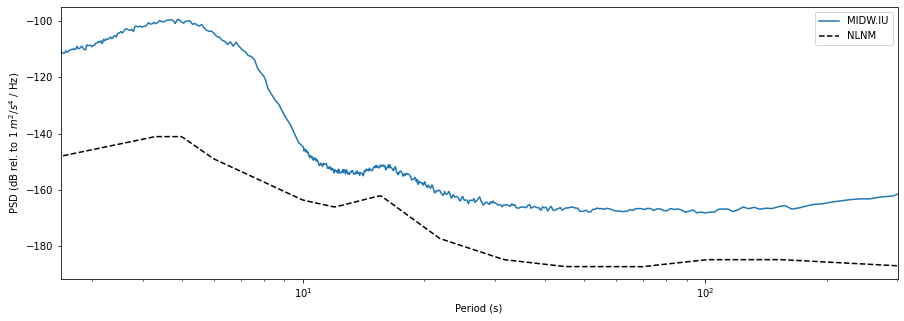

KAPI.II


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

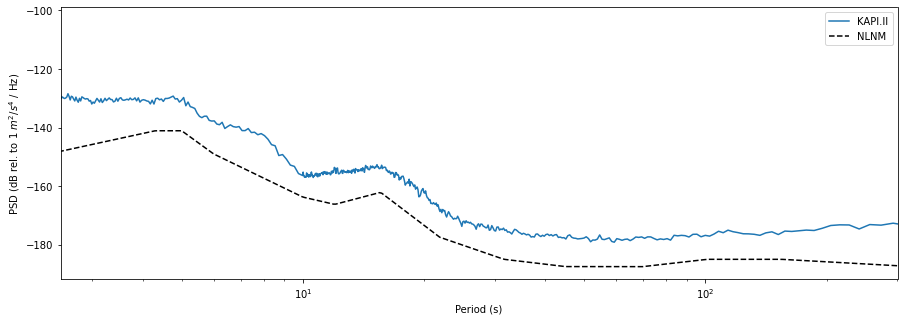

RAYN.II


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

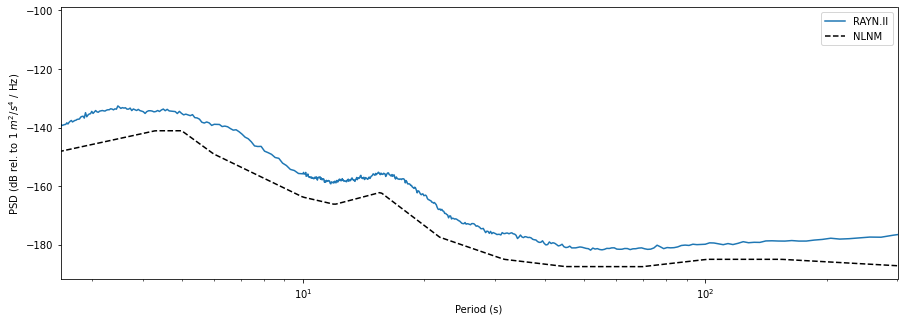

KIV.II


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

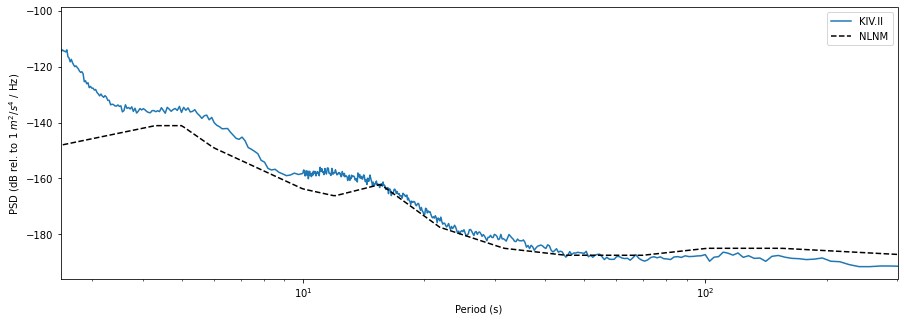

TAM.G


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

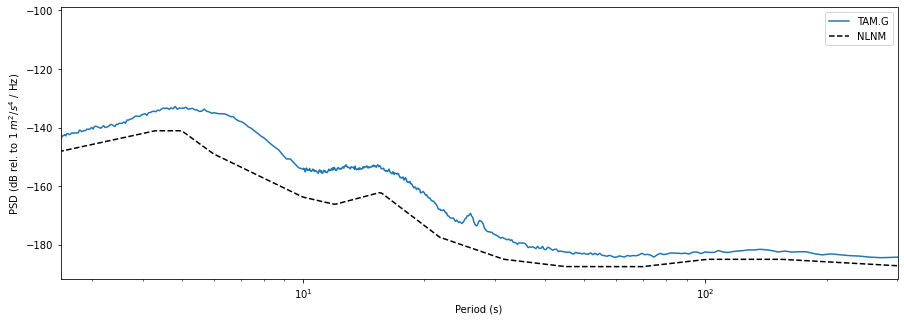

CCD.G


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

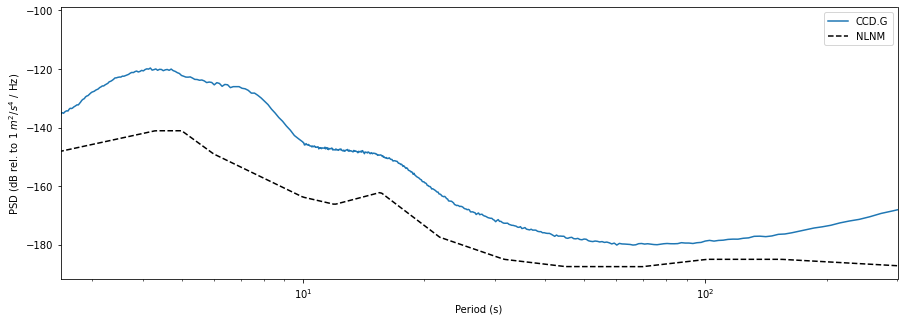

SAML.IU


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

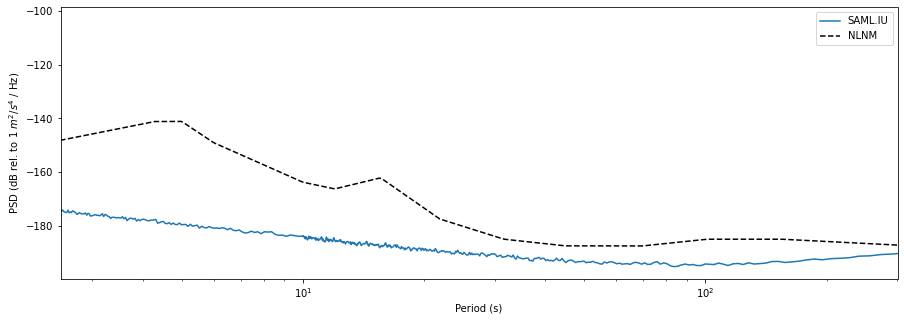

UNM.G


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

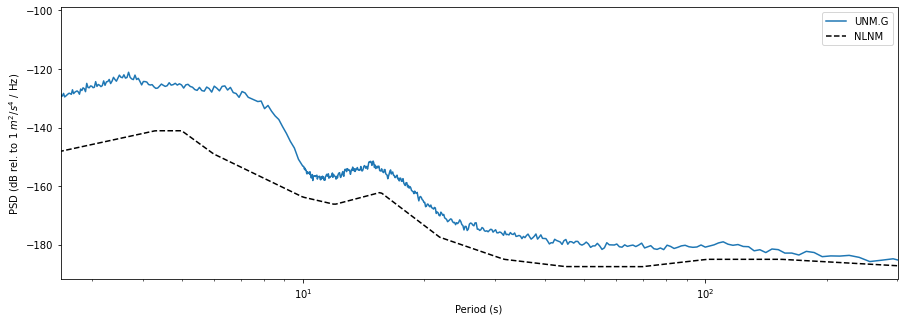

TATO.IU


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

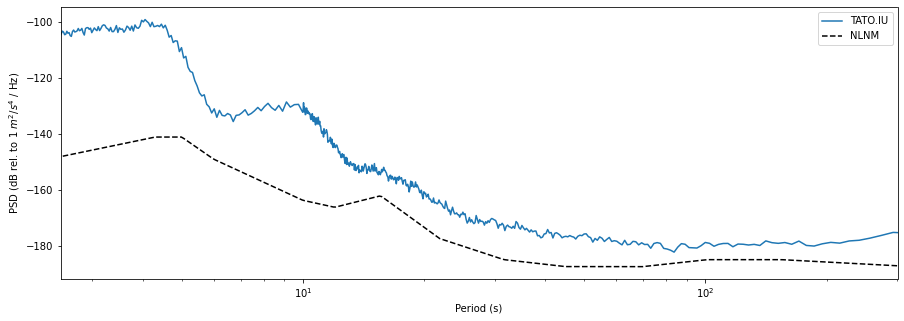

TRIS.IU


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

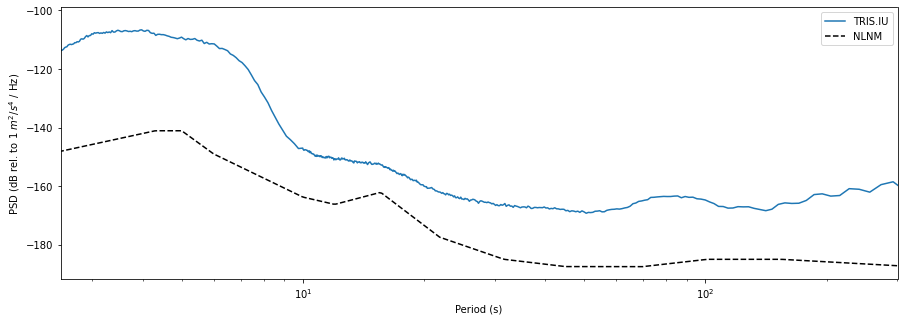

IVI.G


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

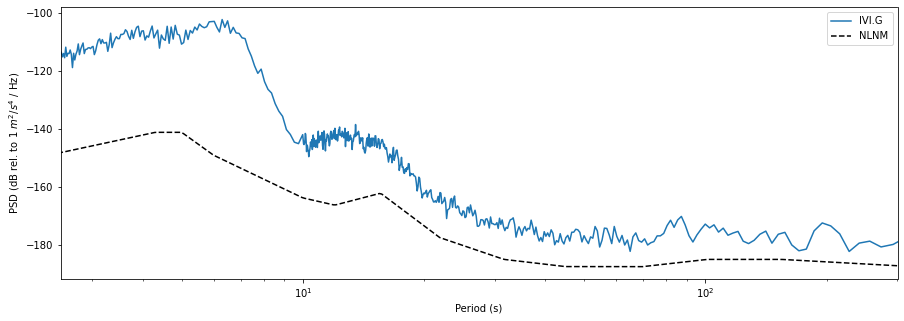

DRV.G


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

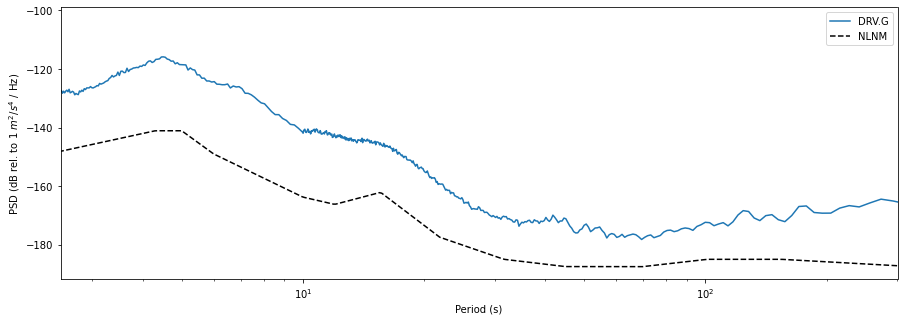

FOMA.G


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

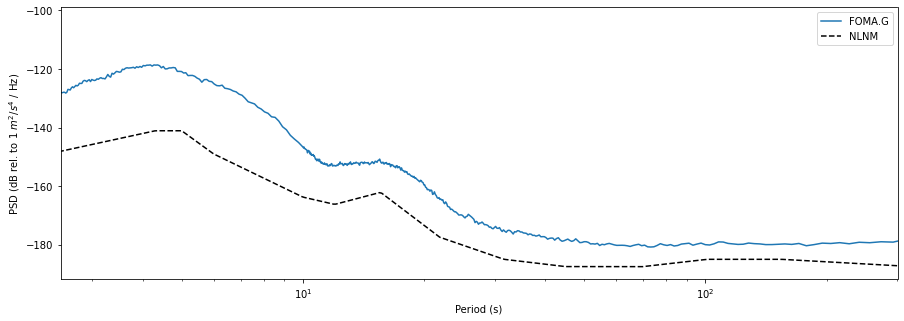

SANVU.G


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

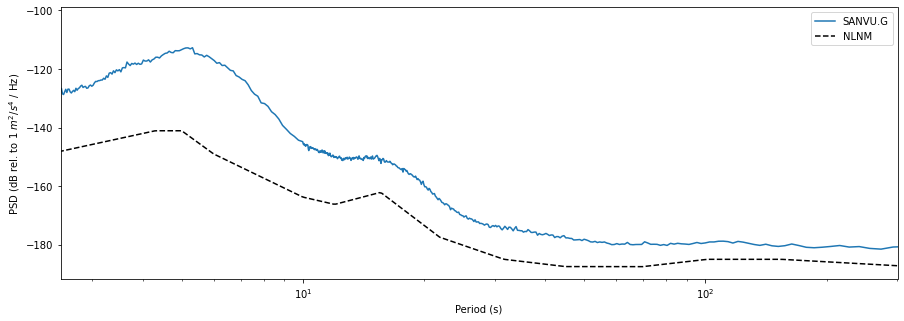

MAKZ.IU


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

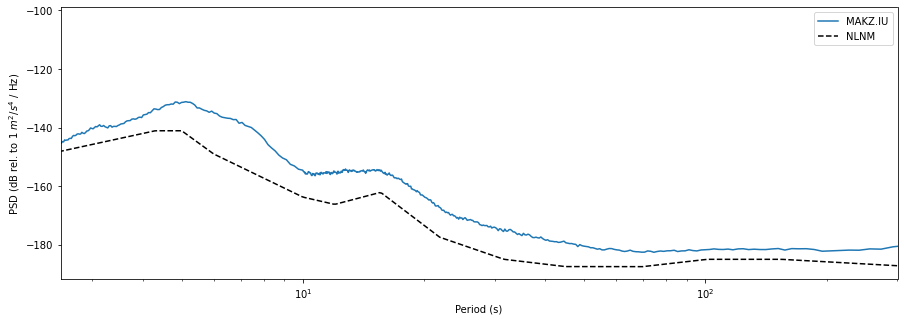

INU.G


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

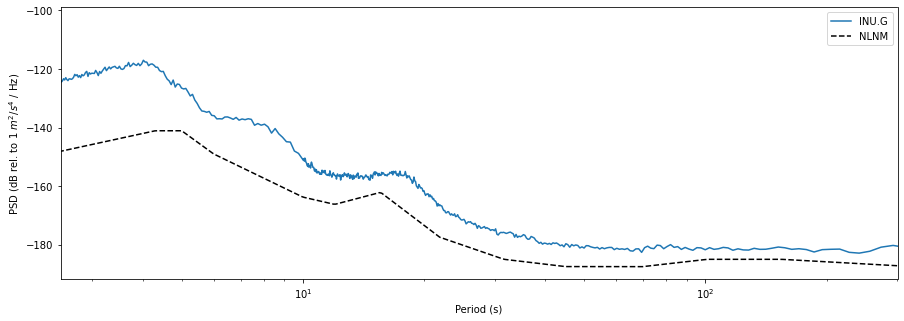

AIS.G


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

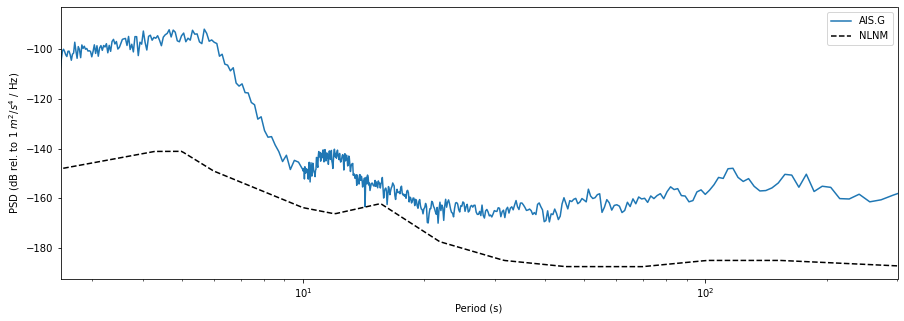

CRZF.G


<Figure size 1080x360 with 0 Axes>

(2.5, 300)

Text(0.5, 0, 'Period (s)')

Text(0, 0.5, 'PSD (dB rel. to 1 $m^2/s^4$ / Hz)')

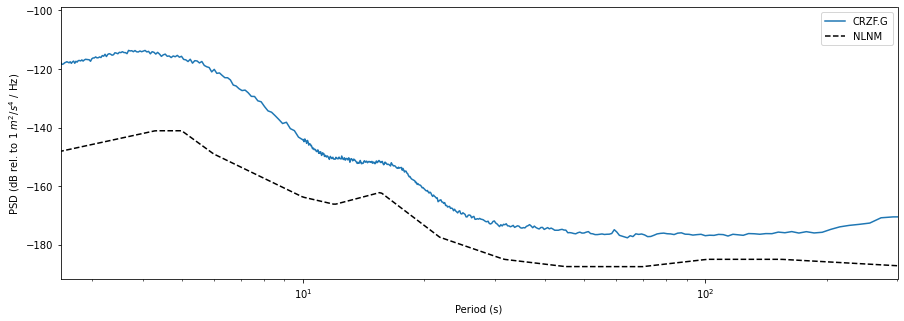

In [121]:
import time

tmp = np.load(config['noise_models'])
nm_periods, nlnm, nhnm = tmp['model_periods'], tmp['low_noise'], tmp['high_noise']; del tmp


for sta in medians_stations.keys():
    print(sta)

    if sta != "frequencies":
        plt.figure(figsize=(15,5))
        plt.semilogx(pp, medians_stations[sta], label=sta)
        plt.semilogx(nm_periods, nlnm, label="NLNM", color="k", ls="--")
        plt.xlim(2.5,300)
        plt.xlabel("Period (s)")
        plt.legend(loc="upper right")
        plt.ylabel(r"PSD (dB rel. to 1 $m^2/s^4$ / Hz)")
        time.sleep(1)
    
    plt.show();


## Makeplot Colorlines

In [10]:
def __makeplot_colorlines(config, ff, psds):

    from numpy import isnan, median, mean, std, array, zeros, linspace
    from scipy.stats import median_abs_deviation as mad

    def __get_minimal_psd(psds):

        from numpy import nanmin, array, nonzero, zeros

        min_psd = zeros(psds.shape[1])

        for f in range(psds.shape[1]):
            a = psds[:,f]
            min_psd[f] = nanmin(a[nonzero(a)])

        return min_psd

    def __get_median_psd(psds):

        from numpy import median, zeros, isnan

        med_psd = zeros(psds.shape[1])

        for f in range(psds.shape[1]):
            a = psds[:,f]
            med_psd[f] = median(a[~isnan(a)])

        return med_psd    

    tmp = np.load(config['noise_models'])
    nm_periods, nlnm, nhnm = tmp['model_periods'], tmp['low_noise'], tmp['high_noise']; del tmp

    
    ##____________________________
    
    fig, ax = plt.subplots(1,1, figsize=(15,10), sharey=False, sharex=True)

    font = 15

    N = psds.shape[0]
    colors = plt.cm.rainbow(linspace(0, 1, N))
#     colors = plt.cm.gray(linspace(0, 1, N))

    for n, psd in enumerate(psds):
        ax.loglog(ff, psd, color=colors[n], alpha=0.7, zorder=2)


    ## add scatter for colorbar object only
    for n, psd in enumerate(psds):
        p2 = ax.scatter(ff[0], psd[0], s=0., c=n, cmap='rainbow', vmin=0, vmax=N)

    ## calculate median of all psds
    psds_median = __get_median_psd(psds)
    ax.loglog(ff, psds_median, 'black', zorder=3, alpha=0.9)

    
    ax.plot(nm_periods, 10**(nlnm/10), color='black', alpha=0.8, ls="--")
    ax.plot(nm_periods, 10**(nhnm/10), color='black', alpha=0.8, ls="--")
    
#     ax.set_title(f"{station} ({len(psds_selected)})", fontsize=font)

    ax.set_xlabel("Period (s)", fontsize=font)

    ax.set_ylabel(r"PSD (rad$^2$/s$^2$/$Hz)$", fontsize=font)
    
    ax.grid(True, which="both", ls="-", alpha=0.5)
    
    ax.set_xlim(3, 300)
    ax.set_ylim(1e-19, 1e-9)
    
    plt.tick_params(axis='both', labelsize=font-3)

    
    ## set colorbar at bottom
    cbar = fig.colorbar(p2, orientation='horizontal', ax=ax, aspect=50)

    plt.show();

    return fig

In [11]:
array = np.array([medians_stations[sta] for sta in medians_stations.keys() if sta is not 'frequencies' and sta.split(".")[0] not in config['excluded_stations']])

psds = __conversion(array, informat='DB', outformat='PSD')

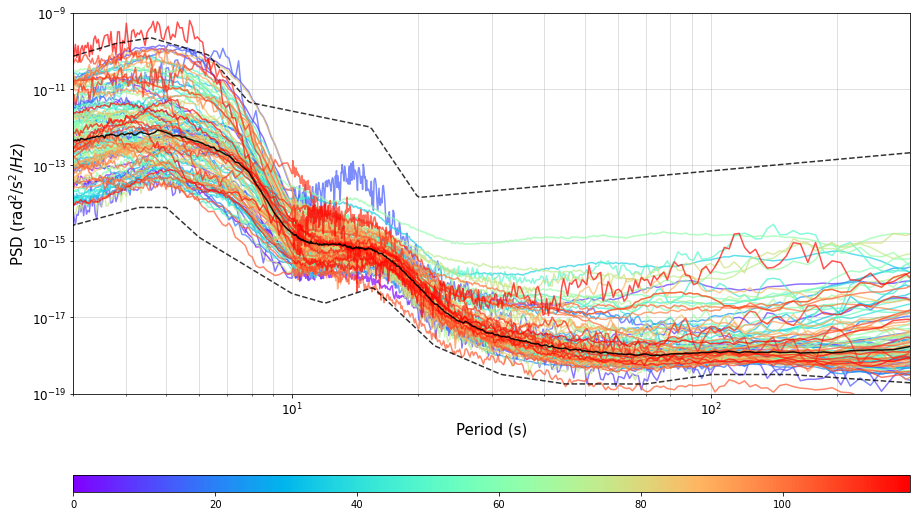

In [12]:
fig = __makeplot_colorlines(config, pp, psds)

In [13]:
fig.savefig(config['outdir_figures']+"PPSD_all_stations_"+config['year']+"colorlines.png", fmt="png", bbox_inches="tight", dpi=300, transparent=None)

### Plot as PPSD

In [14]:
array = np.array([medians_stations[sta] for sta in medians_stations.keys() if sta is not 'frequencies' and sta.split(".")[0] not in config['excluded_stations']])

psds = __conversion(array, informat='DB', outformat='PSD')

In [15]:
def __calculate_density(psd_array, bins=20, density=False):

    from numpy import argmax, std, median, isnan, array, histogram

    
    def __convert_to_log(in_psds):

        print(in_psds.shape)

        out_psds = np.zeros(in_psds.shape)
        rows_with_zeros = 0
        for i, psd in enumerate(in_psds):
            if np.count_nonzero(psd) != len(psd):
                rows_with_zeros +=1
                psd = [nan for val in psd if val == 0]
            out_psds[i,:] = np.log10(psd)
            if np.isinf(out_psds[i,:]).any():
                out_psds[i,:] = nan * ones(len(out_psds[i,:]))

        return out_psds

    psd_array = __convert_to_log(psd_array)
    
    psds = []
    for psd in psd_array:
        if not isnan(psd).all():
            psds.append(psd)
    psd_array = array(psds)
    
    max_value = max([max(sublist) for sublist in psd_array])
    min_value = min([min(sublist) for sublist in psd_array])


    dist, dist_maximas, bins_maximas, bins_medians, stds = [], [], [], [], []

    for h in range(len(psd_array[1])):
        
        psd = psd_array[:,h]
        
        hist, bin_edges = histogram(psd, bins=bins, range=(min_value, max_value), density=density);
        
        bin_mids = 0.5*(bin_edges[1:] + bin_edges[:-1])
        
#         if density:
#             hist = [val / len(psd_array[:,h]) for val in hist]
        
        
        dist.append(hist)
        stds.append(std(hist))
        dist_maximas.append(max(hist))
        bins_maximas.append(bin_mids[argmax(hist)])
        
        psd = psd[~(isnan(psd))]
        bins_medians.append(median(psd[psd != 0]))

    ## undo log conversion    
    output = {}
    output['dist'] = array(dist)
    output['bin_mids'] = 10**array(bin_mids)
    output['bins_maximas'] = 10**array(bins_maximas)
    output['stds'] = 10**array(stds)
    output['bins_medians'] = 10**array(bins_medians)
    output['set_density'] = density
    output['total'] = psd_array.shape[0]
    
    return output

In [16]:
def __makeplot_PPSD(ff, output, config, mode="DB", plot_noise_models=False):

    from matplotlib import colors
    from numpy import ones, convolve, array, log10, roll

    tmp = np.load(config['noise_models'])
    nm_periods, nlnm, nhnm = tmp['model_periods'], tmp['low_noise'], tmp['high_noise']; del tmp

    bins, bins_medians, bins_maximas, dist = output['bin_mids'], output['bins_medians'], output['bins_maximas'], output['dist']
    
    if mode is "DB":
        y_axis = 10*log10(bins)
    else:
        y_axis = bins
        
    x_axis = ff


    ## plotting
    fig = plt.figure(figsize=(13,6))

    font=20

    cmap = plt.cm.get_cmap('magma_r')
#     cmap = plt.cm.get_cmap('gray_r')
    cmap.set_under(color='white')

    im = plt.pcolor(x_axis, y_axis, dist.T, 
                    cmap=cmap,
                    vmin=1e-12,
                    alpha=0.99,
                   )

    if mode is "DB":
        plt.plot(x_axis, 10*log10(bins_medians), color='black', alpha=0.5)
        if plot_noise_models:
            plt.plot(nm_periods, nlnm, color='black', alpha=0.8, ls="--")
            plt.plot(nm_periods, nhnm, color='black', alpha=0.8, ls="--")      
            plt.ylim(-200, -80)


    else:
        plt.plot(x_axis, bins_medians, color='black', alpha=0.8)
        if plot_noise_models:
            plt.plot(nm_periods, 10**(nlnm/10), color='black', alpha=0.8, ls="--")
            plt.plot(nm_periods, 10**(nhnm/10), color='black', alpha=0.8, ls="--")
            plt.ylim(10**-20, 10**-7)
        plt.yscale('log')

    
    ## modify x-axis
    plt.xscale('log')
#     plt.xlim([min(x_axis), max(x_axis)])
    plt.xlim(2.5, 300)

    plt.ylim(1e-20, 1e-9)
    
    ## add colorbar
    caxes = fig.add_axes()
    cb = plt.colorbar(im, cax=caxes)
    cb.ax.tick_params(labelsize=font-2)

    
    if output['set_density']:
        cb.set_label("Propability Density", fontsize=font)
    else:
        cb.set_label("Counts", fontsize=font)
    
    if mode is "DB":
        plt.ylabel(r"PPSD in dB (rel. to 1 m$^4$/s$^2$/$Hz$)", fontsize=font)
        plt.xlabel("Period in s",fontsize=font)
    else:
        plt.ylabel(r"PPSD (m$^4$/s$^2$/$Hz$)", fontsize=font)
        plt.xlabel("Period (s)",fontsize=font)
    
#     plt.grid(axis="both", which="both", ls="--", zorder=0)

    plt.tick_params(axis='both', labelsize=font-3)

    plt.show();
    return fig

In [17]:
output = __calculate_density(psds, bins=50, density=True)

(118, 573)


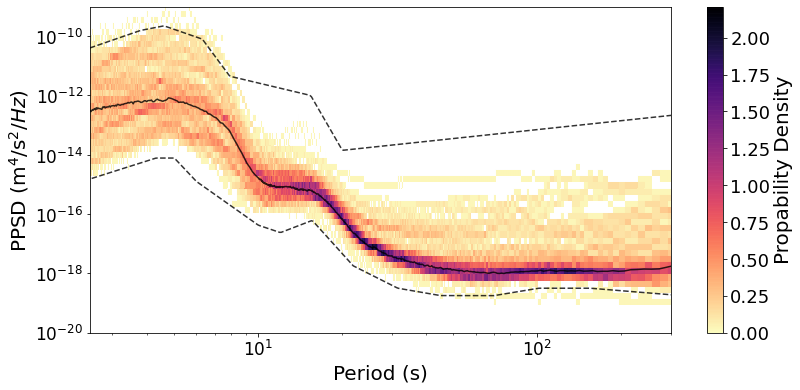

In [18]:
fig = __makeplot_PPSD(pp, output, config, mode="PSD", plot_noise_models=True)

In [19]:
fig.savefig(config['outdir_figures']+"PPSD_all_stations_"+config['year']+".png", fmt="png", bbox_inches="tight", dpi=300, transparent=None)

## Analyse Quality of each Station

In [20]:
def __read_spectra_nc(path, fname):

    print(f"\nreading {path}{fname}")

    f = nc.Dataset(str(path)+str(fname),'r')

    # for key in f.variables.keys():
    #        print(key)

    sta = f.variables["trace_id"][:][0].split(".")[1]
    loc = f.variables["trace_id"][:][0].split(".")[0]
    name = f"{sta}.{loc}"

    ff = f.variables["frequency"][:]
    ss = f.variables["spectrogram"][:]

    return name, ff, ss

In [21]:
def __makeplot_colorlines(config, ff, psds, columns):

    from numpy import isnan, median, mean, std, array, zeros, linspace
    from scipy.stats import median_abs_deviation as mad
    
#     psds_median, psds_mean, psds_std, psds_mad = [],[],[],[]
#     for fcross in range(psds.shape[1]):
#         data = psds[:,fcross]
#         psds_median.append(median(data[~isnan(data)]))
#         psds_mean.append(mean(data[~isnan(data)]))
#         psds_std.append(std(data[~isnan(data)]))
#         psds_mad.append(mad(data[~isnan(data)]))
        
    psds_minimal = __get_minimal_psd(array(psds))
#     psds_minimum = __get_minimum_psd(array(psds), ff)
    
    print("\nplotting ...")
        
    ##____________________________
    
    fig, ax = plt.subplots(1,1, figsize=(15,10), sharey=False, sharex=True)

    font = 12

    N = psds.shape[0]
    colors = plt.cm.rainbow(linspace(0, 1, N))

    psds_selected = []
    for n, psd in enumerate(psds):
        
        station_name = columns.split(".")[0]
        if station_name in config['limits'].keys():
            limits = config['limits'][station_name]
        else:
            limits = [1e-20, 1e-11]
            
        if np.mean(psd) > limits[1] or np.mean(psd[-150:-15]) <  limits[0] or np.min(psd) < 1e-24:
            ax.loglog(ff, psd, color="grey", alpha=0.2, zorder=1)
        else:
            ax.loglog(ff, psd, color=colors[n], alpha=0.7, zorder=2)
            psds_selected.append(psd)
            
    ## turn list to array
    psds_selected = array(psds_selected)
    
    ## add scatter for colorbar object only
    for n, psd in enumerate(psds):
        p2 = ax.scatter(ff[0], psd[0], s=0., c=n, cmap='rainbow', vmin=0, vmax=N)

    ## calculate median of all psds
    psds_median = __get_median_psd(psds)
    ax.loglog(ff, psds_median, 'black', zorder=3, alpha=0.9)

    ## calculate median of selected psds
    psds_selected_median = __get_median_psd(psds_selected)
    ax.loglog(ff, psds_selected_median, 'white', zorder=3, alpha=0.9)
    

    ax.set_title(columns, fontsize=font)

    ax.set_xlabel("Frequency (Hz)", fontsize=font)

    ax.set_ylabel(r"PSD (rad$^2$/s$^2$/$Hz)$", fontsize=font)
    
    ax.grid(True, which="both", ls="-", alpha=0.5)
    
    ax.set_xlim(min(ff), max(ff))
#     ax.set_xlim(10**log10(config['frequency_limits'][0]), 10**log10(config['frequency_limits'][1]))
    
    ## set colorbar at bottom
    cbar = fig.colorbar(p2, orientation='horizontal', ax=ax, aspect=50)

    ## redefine ticks of colorbar
#     dates = columns
#     new_ticks=[]
#     for t in cbar.get_ticks(): 
#         new_ticks.append(dates.astype(str)[int(t)])
#     cbar.ax.set_xticklabels(new_ticks)


    plt.show();
    
    out = DataFrame()
#     out['frequencies'] = ff
#     out['psds_minimal'] = array(psds_minimal)
#     out['psds_median'] = array(psds_median)
#     out['psds_mean'] = array(psds_mean)
#     out['psds_std'] = array(psds_std)
#     out['psds_mad'] = array(psds_mad)
    
    
    return fig, out

In [22]:
def __get_minimal_psd(psds):

    from numpy import nanmin, array, nonzero, zeros
    
    min_psd = zeros(psds.shape[1])
    
    for f in range(psds.shape[1]):
        a = psds[:,f]
        min_psd[f] = nanmin(a[nonzero(a)])
    
    return min_psd

In [23]:
def __get_median_psd(psds):

    from numpy import median, zeros, isnan

    med_psd = zeros(psds.shape[1])

    for f in range(psds.shape[1]):
        a = psds[:,f]
        med_psd[f] = median(a[~isnan(a)])

    return med_psd

In [24]:
config['limits'] = {
    "GNI":  [1e-20, 1e-12],
    "KDAK": [1e-20, 1e-9],    
    "RER":  [1e-20, 1e-9],
    "TIXI": [1e-18, 1e-8],    
    "GUMO": [1e-19, 1e-9],    
    "WAKE": [1e-18, 1e-8],    
    "RAO":  [1e-21, 1e-9],
    "AIS":  [1e-20, 1e-9],    
    "TARA": [1e-20, 1e-8],
    "MAKZ": [1e-20, 1e-9],    
    "DAV":  [1e-19, 1e-11],    
    "FOMA": [1e-19, 1e-11],
    "CTAO": [1e-19, 1e-11],    
    "KIP":  [1e-20, 1e-9],    
    "TATO": [1e-20, 1e-9],    
    "TRIS": [1e-20, 1e-10],    
    "RAO":  [1e-20, 1e-9],    
    "FUNA": [1e-19, 1e-9],    
    "MIDW": [1e-17, 1e-9],    
    "MPG":  [1e-19, 1e-10],    
    "HKT":  [1e-20, 1e-12],    
    "KWJN": [1e-20, 1e-9],    
    "TARA": [1e-19, 1e-8],    
    "ROCAM":[1e-20, 1e-9],    
    "PAYG": [1e-18, 1e-11],    
    "JOHN": [1e-20, 1e-9],    
    "OTAV": [1e-19, 1e-11],    
    "PPTF": [1e-20, 1e-9],    
    "YSS":  [1e-19, 1e-11],    
    "RAR":  [1e-20, 1e-9],    
    "KMBO": [1e-18, 1e-12],    
    "ADK":  [1e-19, 1e-10],    
    "BORG": [1e-20, 1e-8],    
    "COCO": [1e-20, 1e-8],    
    "DGAR": [1e-20, 1e-9],    
    "PTCN": [1e-19, 1e-8],    
    "BILL": [1e-20, 1e-10],    
    "CMLA": [1e-20, 1e-10],    
    "BRKV": [1e-20, 1e-12],    
    "PAF":  [1e-19, 1e-9],    
}

ESACCI-SEASTATE-L2-MSSPEC-IU_GNI_LHZ_10_2019-fv01.nc
ESACCI-SEASTATE-L2-MSSPEC-IU_NWAO_LHZ_10_2019-fv01.nc
ESACCI-SEASTATE-L2-MSSPEC-IU_BBSR_LHZ_00_2019-fv01.nc
ESACCI-SEASTATE-L2-MSSPEC-IU_MA2_LHZ_00_2019-fv01.nc
ESACCI-SEASTATE-L2-MSSPEC-IU_COLA_LHZ_10_2019-fv01.nc
ESACCI-SEASTATE-L2-MSSPEC-IU_FURI_LHZ_00_2019-fv01.nc
ESACCI-SEASTATE-L2-MSSPEC-IU_GUMO_LHZ_10_2019-fv01.nc
ESACCI-SEASTATE-L2-MSSPEC-G_ECH_LHZ_00_2019-fv01.nc
ESACCI-SEASTATE-L2-MSSPEC-IU_JOHN_LHZ_00_2019-fv01.nc
ESACCI-SEASTATE-L2-MSSPEC-IU_BILL_LHZ_10_2019-fv01.nc
ESACCI-SEASTATE-L2-MSSPEC-IU_KMBO_LHZ_10_2019-fv01.nc
ESACCI-SEASTATE-L2-MSSPEC-G_KIP_LHZ_10_2019-fv01.nc
ESACCI-SEASTATE-L2-MSSPEC-IU_QSPA_LHZ_80_2019-fv01.nc
ESACCI-SEASTATE-L2-MSSPEC-IU_KEV_LHZ_10_2019-fv01.nc
ESACCI-SEASTATE-L2-MSSPEC-IU_DAV_LHZ_10_2019-fv01.nc
ESACCI-SEASTATE-L2-MSSPEC-IU_KONO_LHZ_10_2019-fv01.nc
ESACCI-SEASTATE-L2-MSSPEC-II_BORG_LHZ_00_2019-fv01.nc
ESACCI-SEASTATE-L2-MSSPEC-II_FFC_LHZ_10_2019-fv01.nc
ESACCI-SEASTATE-L2-MSSPEC-IU_WCI_LHZ_


plotting ...


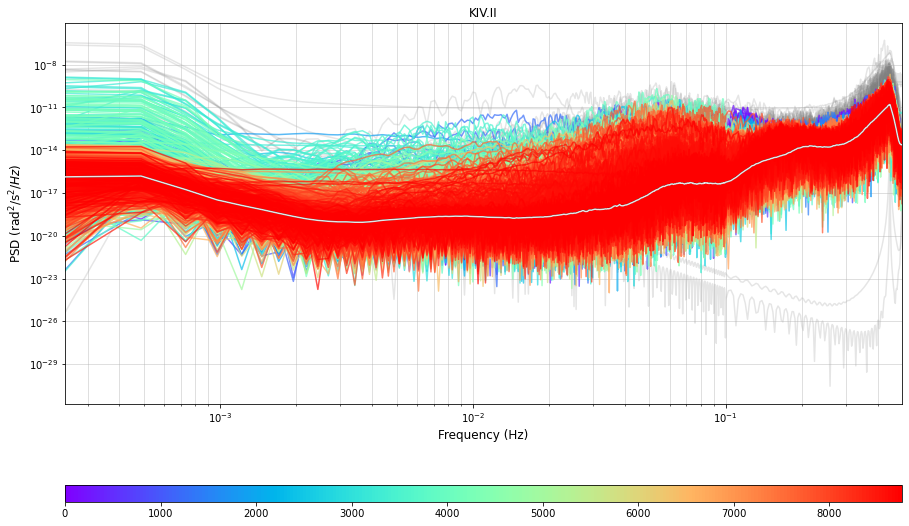

In [ ]:
for i, filename in enumerate(config['spectra_files']):
    print(filename)

    if "KIV" in filename: 

        name, ff ,ss = __read_spectra_nc(config['workdir']+config['year']+"/", filename)

        fig, out = __makeplot_colorlines(config, ff, ss.T, name)

        fig.savefig(f"/home/brotzer/Downloads/tmp/{name}.png", transparent=False, dpi=300)
